# House Prices - Regression with XGBoost

## Overview

This notebook explores the data provided by the [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview) competition.  
Using XGBoost, we, a team of three students, are aiming to predict house prices.

## Part I: Exploratory Data Analysis

We are provided with 4 files:  
data_description.txt  
sample_submission.csv
test.csv  
train.csv  

The contents of sample_submission.csv:  

```
Id,SalePrice  
1461,169000.1  
1462,187724.1233  
1463,175221  
etc.  
```

The contents of data_description.txt:  

MSSubClass: Identifies the type of dwelling involved in the sale.	  
  
        20	1-STORY 1946 & NEWER ALL STYLES  
        30	1-STORY 1945 & OLDER  
        40	1-STORY W/FINISHED ATTIC ALL AGES  
        45	1-1/2 STORY - UNFINISHED ALL AGES  
        50	1-1/2 STORY FINISHED ALL AGES  
        60	2-STORY 1946 & NEWER  
        70	2-STORY 1945 & OLDER  
        75	2-1/2 STORY ALL AGES  
        80	SPLIT OR MULTI-LEVEL  
        85	SPLIT FOYER  
        90	DUPLEX - ALL STYLES AND AGES  
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER  
       150	1-1/2 STORY PUD - ALL AGES  
       160	2-STORY PUD - 1946 & NEWER  
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER  
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES   
  
MSZoning: Identifies the general zoning classification of the sale.  
		  
       A	Agriculture  
       C	Commercial  
       FV	Floating Village Residential  
       I	Industrial  
       RH	Residential High Density  
       RL	Residential Low Density  
       RP	Residential Low Density Park   
       RM	Residential Medium Density  
	  
LotFrontage: Linear feet of street connected to property  
  
LotArea: Lot size in square feet  
  
Street: Type of road access to property  
  
       Grvl	Gravel	  
       Pave	Paved  
       	  
Alley: Type of alley access to property  
  
       Grvl	Gravel  
       Pave	Paved  
       NA 	No alley access  
		  
LotShape: General shape of property  
  
       Reg	Regular	  
       IR1	Slightly irregular  
       IR2	Moderately Irregular  
       IR3	Irregular  
         
LandContour: Flatness of the property  
  
       Lvl	Near Flat/Level	  
       Bnk	Banked - Quick and significant rise from street grade to building  
       HLS	Hillside - Significant slope from side to side  
       Low	Depression  
		  
Utilities: Type of utilities available  
		  
       AllPub	All public Utilities (E,G,W,& S)	  
       NoSewr	Electricity, Gas, and Water (Septic Tank)  
       NoSeWa	Electricity and Gas Only  
       ELO	Electricity only	  
	  
LotConfig: Lot configuration  
  
       Inside	Inside lot  
       Corner	Corner lot  
       CulDSac	Cul-de-sac  
       FR2	Frontage on 2 sides of property  
       FR3	Frontage on 3 sides of property  
	  
LandSlope: Slope of property  
		  
       Gtl	Gentle slope  
       Mod	Moderate Slope	  
       Sev	Severe Slope  
	  
Neighborhood: Physical locations within Ames city limits  
  
       Blmngtn	Bloomington Heights  
       Blueste	Bluestem  
       BrDale	Briardale  
       BrkSide	Brookside  
       ClearCr	Clear Creek  
       CollgCr	College Creek  
       Crawfor	Crawford  
       Edwards	Edwards  
       Gilbert	Gilbert  
       IDOTRR	Iowa DOT and Rail Road  
       MeadowV	Meadow Village  
       Mitchel	Mitchell  
       Names	North Ames  
       NoRidge	Northridge  
       NPkVill	Northpark Villa  
       NridgHt	Northridge Heights  
       NWAmes	Northwest Ames  
       OldTown	Old Town  
       SWISU	South & West of Iowa State University  
       Sawyer	Sawyer  
       SawyerW	Sawyer West  
       Somerst	Somerset  
       StoneBr	Stone Brook  
       Timber	Timberland  
       Veenker	Veenker  
			  
Condition1: Proximity to various conditions  
	  
       Artery	Adjacent to arterial street  
       Feedr	Adjacent to feeder street	  
       Norm	Normal	  
       RRNn	Within 200' of North-South Railroad  
       RRAn	Adjacent to North-South Railroad  
       PosN	Near positive off-site feature--park, greenbelt, etc.  
       PosA	Adjacent to postive off-site feature  
       RRNe	Within 200' of East-West Railroad  
       RRAe	Adjacent to East-West Railroad  
	  
Condition2: Proximity to various conditions (if more than one is present)  
		  
       Artery	Adjacent to arterial street  
       Feedr	Adjacent to feeder street	  
       Norm	Normal	  
       RRNn	Within 200' of North-South Railroad  
       RRAn	Adjacent to North-South Railroad  
       PosN	Near positive off-site feature--park, greenbelt, etc.  
       PosA	Adjacent to postive off-site feature  
       RRNe	Within 200' of East-West Railroad  
       RRAe	Adjacent to East-West Railroad  
	  
BldgType: Type of dwelling  
		  
       1Fam	Single-family Detached	  
       2FmCon	Two-family Conversion; originally built as one-family dwelling  
       Duplx	Duplex  
       TwnhsE	Townhouse End Unit  
       TwnhsI	Townhouse Inside Unit  
	   
HouseStyle: Style of dwelling  
	  
       1Story	One story  
       1.5Fin	One and one-half story: 2nd level finished  
       1.5Unf	One and one-half story: 2nd level unfinished  
       2Story	Two story  
       2.5Fin	Two and one-half story: 2nd level finished  
       2.5Unf	Two and one-half story: 2nd level unfinished  
       SFoyer	Split Foyer  
       SLvl	Split Level  
	  
OverallQual: Rates the overall material and finish of the house  
  
       10	Very Excellent  
       9	Excellent  
       8	Very Good  
       7	Good  
       6	Above Average  
       5	Average  
       4	Below Average  
       3	Fair  
       2	Poor  
       1	Very Poor  
	  
OverallCond: Rates the overall condition of the house  
  
       10	Very Excellent  
       9	Excellent  
       8	Very Good  
       7	Good  
       6	Above Average	  
       5	Average  
       4	Below Average	  
       3	Fair  
       2	Poor  
       1	Very Poor  
		    
YearBuilt: Original construction date  
  
YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)  
  
RoofStyle: Type of roof  
  
       Flat	Flat  
       Gable	Gable  
       Gambrel	Gabrel (Barn)  
       Hip	Hip  
       Mansard	Mansard  
       Shed	Shed  
		  
RoofMatl: Roof material  
   
       ClyTile	Clay or Tile  
       CompShg	Standard (Composite) Shingle  
       Membran	Membrane  
       Metal	Metal  
       Roll	Roll  
       Tar&Grv	Gravel & Tar  
       WdShake	Wood Shakes  
       WdShngl	Wood Shingles  
		  
Exterior1st: Exterior covering on house  
  
       AsbShng	Asbestos Shingles  
       AsphShn	Asphalt Shingles  
       BrkComm	Brick Common  
       BrkFace	Brick Face  
       CBlock	Cinder Block  
       CemntBd	Cement Board  
       HdBoard	Hard Board  
       ImStucc	Imitation Stucco  
       MetalSd	Metal Siding  
       Other	Other  
       Plywood	Plywood  
       PreCast	PreCast	  
       Stone	Stone  
       Stucco	Stucco  
       VinylSd	Vinyl Siding  
       Wd Sdng	Wood Siding  
       WdShing	Wood Shingles  
	  
Exterior2nd: Exterior covering on house (if more than one material)  
  
       AsbShng	Asbestos Shingles  
       AsphShn	Asphalt Shingles  
       BrkComm	Brick Common  
       BrkFace	Brick Face  
       CBlock	Cinder Block  
       CemntBd	Cement Board  
       HdBoard	Hard Board  
       ImStucc	Imitation Stucco  
       MetalSd	Metal Siding  
       Other	Other  
       Plywood	Plywood  
       PreCast	PreCast  
       Stone	Stone  
       Stucco	Stucco  
       VinylSd	Vinyl Siding  
       Wd Sdng	Wood Siding  
       WdShing	Wood Shingles  
	  
MasVnrType: Masonry veneer type  
  
       BrkCmn	Brick Common   
       BrkFace	Brick Face  
       CBlock	Cinder Block  
       None	None  
       Stone	Stone  
	  
MasVnrArea: Masonry veneer area in square feet  
  
ExterQual: Evaluates the quality of the material on the exterior   
		  
       Ex	Excellent  
       Gd	Good  
       TA	Average/Typical  
       Fa	Fair  
       Po	Poor  
		  
ExterCond: Evaluates the present condition of the material on the exterior  
		  
       Ex	Excellent  
       Gd	Good  
       TA	Average/Typical  
       Fa	Fair  
       Po	Poor  
		  
Foundation: Type of foundation  
		  
       BrkTil	Brick & Tile  
       CBlock	Cinder Block  
       PConc	Poured Contrete	  
       Slab	Slab  
       Stone	Stone  
       Wood	Wood  
		  
BsmtQual: Evaluates the height of the basement  
  
       Ex	Excellent (100+ inches)	  
       Gd	Good (90-99 inches)  
       TA	Typical (80-89 inches)  
       Fa	Fair (70-79 inches)  
       Po	Poor (<70 inches)  
       NA	No Basement  
		    
BsmtCond: Evaluates the general condition of the basement  
  
       Ex	Excellent  
       Gd	Good  
       TA	Typical - slight dampness allowed  
       Fa	Fair - dampness or some cracking or settling  
       Po	Poor - Severe cracking, settling, or wetness  
       NA	No Basement  
	  
BsmtExposure: Refers to walkout or garden level walls  
  
       Gd	Good Exposure  
       Av	Average Exposure (split levels or foyers typically score average or above)	  
       Mn	Mimimum Exposure  
       No	No Exposure  
       NA	No Basement  
	  
BsmtFinType1: Rating of basement finished area  
  
       GLQ	Good Living Quarters  
       ALQ	Average Living Quarters  
       BLQ	Below Average Living Quarters	  
       Rec	Average Rec Room   
       LwQ	Low Quality  
       Unf	Unfinshed  
       NA	No Basement  
		   
BsmtFinSF1: Type 1 finished square feet  
  
BsmtFinType2: Rating of basement finished area (if multiple types)  
  
       GLQ	Good Living Quarters  
       ALQ	Average Living Quarters  
       BLQ	Below Average Living Quarters	  
       Rec	Average Rec Room  
       LwQ	Low Quality  
       Unf	Unfinshed   
       NA	No Basement  
  
BsmtFinSF2: Type 2 finished square feet  
  
BsmtUnfSF: Unfinished square feet of basement area    
  
TotalBsmtSF: Total square feet of basement area  
  
Heating: Type of heating  
		  
       Floor	Floor Furnace  
       GasA	Gas forced warm air furnace  
       GasW	Gas hot water or steam heat  
       Grav	Gravity furnace	    
       OthW	Hot water or steam heat other than gas  
       Wall	Wall furnace  
		  
HeatingQC: Heating quality and condition  
  
       Ex	Excellent  
       Gd	Good  
       TA	Average/Typical  
       Fa	Fair  
       Po	Poor  
		  
CentralAir: Central air conditioning  
  
       N	No  
       Y	Yes  
		  
Electrical: Electrical system  
   
       SBrkr	Standard Circuit Breakers & Romex  
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	   
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)  
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)  
       Mix	Mixed  
		  
1stFlrSF: First Floor square feet  
   
2ndFlrSF: Second floor square feet  
  
LowQualFinSF: Low quality finished square feet (all floors)  
  
GrLivArea: Above grade (ground) living area square feet  
  
BsmtFullBath: Basement full bathrooms  
  
BsmtHalfBath: Basement half bathrooms  
  
FullBath: Full bathrooms above grade  
  
HalfBath: Half baths above grade  
  
Bedroom: Bedrooms above grade (does NOT include basement bedrooms)  
  
Kitchen: Kitchens above grade  
  
KitchenQual: Kitchen quality  
  
       Ex	Excellent  
       Gd	Good  
       TA	Typical/Average  
       Fa	Fair  
       Po	Poor  
       	  
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)  
  
Functional: Home functionality (Assume typical unless deductions are warranted)  
  
       Typ	Typical Functionality  
       Min1	Minor Deductions 1  
       Min2	Minor Deductions 2  
       Mod	Moderate Deductions  
       Maj1	Major Deductions 1  
       Maj2	Major Deductions 2  
       Sev	Severely Damaged  
       Sal	Salvage only  
		  
Fireplaces: Number of fireplaces  
  
FireplaceQu: Fireplace quality  
  
       Ex	Excellent - Exceptional Masonry Fireplace  
       Gd	Good - Masonry Fireplace in main level  
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement  
       Fa	Fair - Prefabricated Fireplace in basement  
       Po	Poor - Ben Franklin Stove  
       NA	No Fireplace  
		  
GarageType: Garage location  
		  
       2Types	More than one type of garage  
       Attchd	Attached to home  
       Basment	Basement Garage  
       BuiltIn	Built-In (Garage part of house - typically has room above garage)  
       CarPort	Car Port  
       Detchd	Detached from home  
       NA	No Garage  
		  
GarageYrBlt: Year garage was built  
		  
GarageFinish: Interior finish of the garage  
  
       Fin	Finished  
       RFn	Rough Finished	  
       Unf	Unfinished  
       NA	No Garage  
		  
GarageCars: Size of garage in car capacity  
  
GarageArea: Size of garage in square feet  
  
GarageQual: Garage quality  
  
       Ex	Excellent  
       Gd	Good  
       TA	Typical/Average  
       Fa	Fair  
       Po	Poor  
       NA	No Garage  
		  
GarageCond: Garage condition  
  
       Ex	Excellent  
       Gd	Good  
       TA	Typical/Average  
       Fa	Fair  
       Po	Poor  
       NA	No Garage  
		  
PavedDrive: Paved driveway  
  
       Y	Paved   
       P	Partial Pavement  
       N	Dirt/Gravel  
		  
WoodDeckSF: Wood deck area in square feet  
  
OpenPorchSF: Open porch area in square feet  
  
EnclosedPorch: Enclosed porch area in square feet  
  
3SsnPorch: Three season porch area in square feet  
  
ScreenPorch: Screen porch area in square feet  
  
PoolArea: Pool area in square feet  
  
PoolQC: Pool quality  
		  
       Ex	Excellent  
       Gd	Good  
       TA	Average/Typical  
       Fa	Fair  
       NA	No Pool  
		  
Fence: Fence quality  
		  
       GdPrv	Good Privacy  
       MnPrv	Minimum Privacy  
       GdWo	Good Wood  
       MnWw	Minimum Wood/Wire  
       NA	No Fence  
	  
MiscFeature: Miscellaneous feature not covered in other categories  
		  
       Elev	Elevator  
       Gar2	2nd Garage (if not described in garage section)  
       Othr	Other  
       Shed	Shed (over 100 SF)  
       TenC	Tennis Court  
       NA	None  
		  
MiscVal: $Value of miscellaneous feature  
  
MoSold: Month Sold (MM)  
  
YrSold: Year Sold (YYYY)  
  
SaleType: Type of sale  
		  
       WD 	Warranty Deed - Conventional  
       CWD	Warranty Deed - Cash  
       VWD	Warranty Deed - VA Loan  
       New	Home just constructed and sold  
       COD	Court Officer Deed/Estate  
       Con	Contract 15% Down payment regular terms  
       ConLw	Contract Low Down payment and low interest  
       ConLI	Contract Low Interest  
       ConLD	Contract Low Down  
       Oth	Other  
		  
SaleCondition: Condition of sale  
  
       Normal	Normal Sale  
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale  
       AdjLand	Adjoining Land Purchase  
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	  
       Family	Sale between family members  
       Partial	Home was not completed when last assessed (associated with New Homes)  
  

### Data overview

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path, PurePath

plt.style.use('seaborn-notebook')
path = Path(r"../input/house-prices-advanced-regression-techniques") #Path().resolve()/"data"
df = pd.read_csv(path/"train.csv", index_col="Id")
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


We notice here that we have columns full of missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Positive skew, leptokurtic

In [6]:
print(f"Skewness: {df['SalePrice'].skew()}")
print(f"Kurtosis: {df['SalePrice'].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


### Training versus testing set: are the distributions similar?

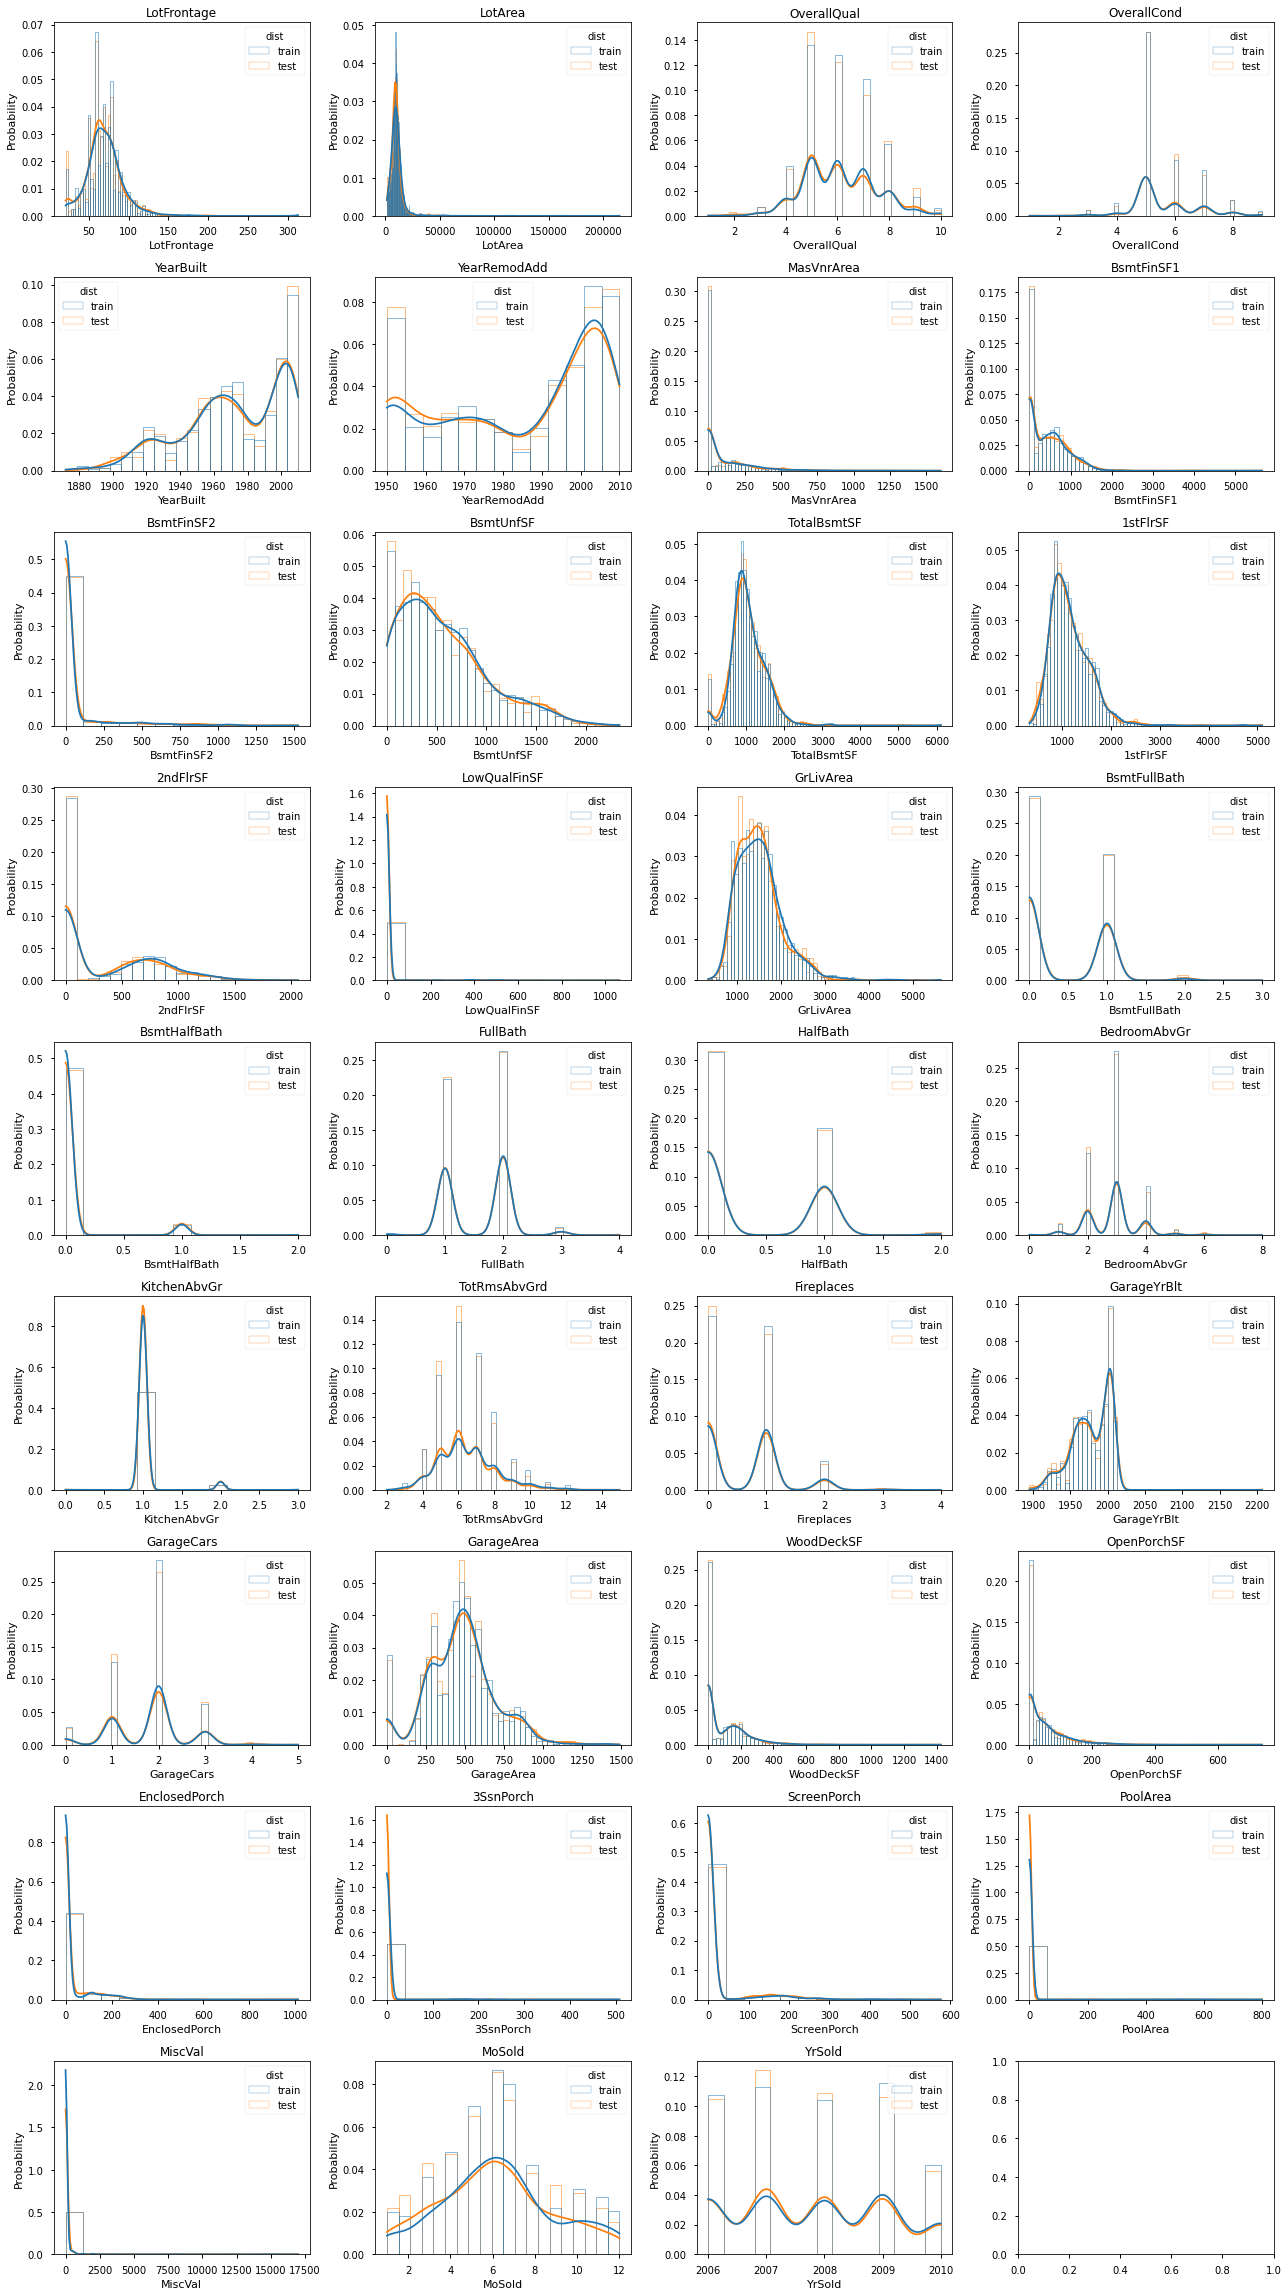

In [7]:
# Big thank you to Vahe Hakobyan for teaching this

train_data = df.copy()
train_data["dist"] = "train"
test_data = pd.read_csv(path/'test.csv')
test_data["dist"] =  "test"

dist_df = train_data.append([test_data])

target_columns = "SalePrice"
corr_matrix = df.corr()

numeric_columns = list(corr_matrix.columns[1:-1].values)
categorical_columns = [col for col in dist_df.columns if col not in list(corr_matrix.columns.values)][:-1]

num_rows, num_cols = 9, 4
fig, ax = plt.subplots(num_rows, num_cols, figsize = (18, 32))

for row in range(num_rows):
    for col in range(num_cols):
        index = row * num_cols + col
        if index < len(numeric_columns):
            sns.histplot(
                x = numeric_columns[index], 
                data = dist_df, 
                ax = ax[row][col], 
                hue = "dist", 
                stat = "probability", 
                kde = True, 
                fill = False).set_title(numeric_columns[index])

plt.tight_layout()

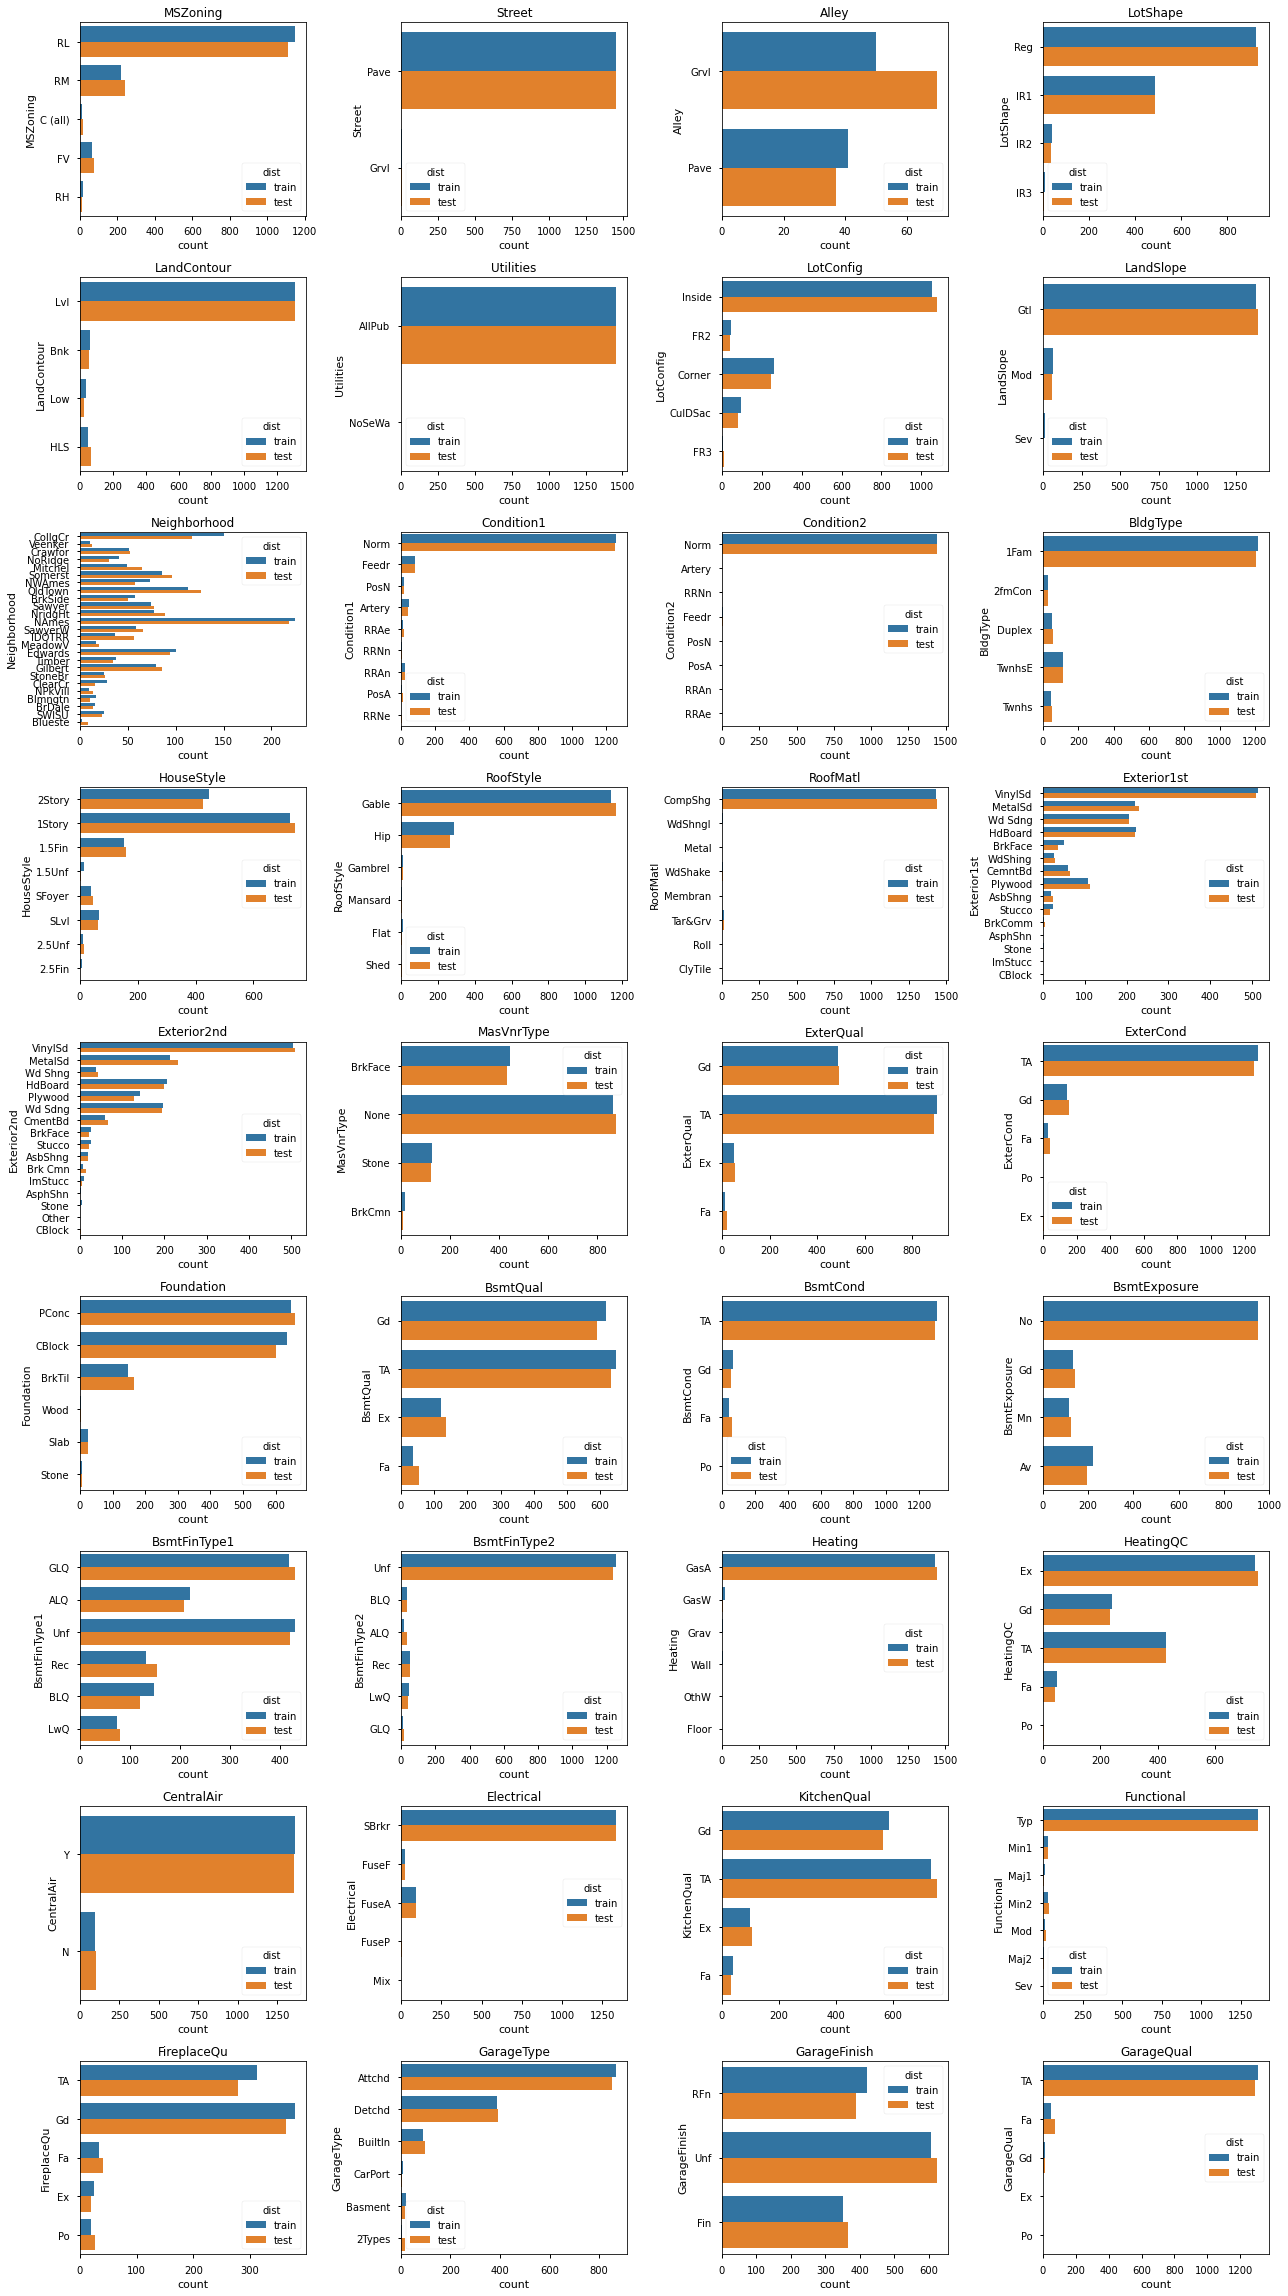

In [8]:
fig, ax = plt.subplots(num_rows,num_cols, figsize = (18, 32))
for row in range(num_rows):
    for col in range(num_cols):
        index = row * num_cols + col
        if index < len(categorical_columns):
            sns.countplot(
                y = categorical_columns[index], 
                data = dist_df, 
                ax = ax[row][col], 
                hue = "dist").set_title(categorical_columns[index])

plt.tight_layout();

As we can see, our training data does not deviate from the testing data too much

### Feature vs Target Correlations

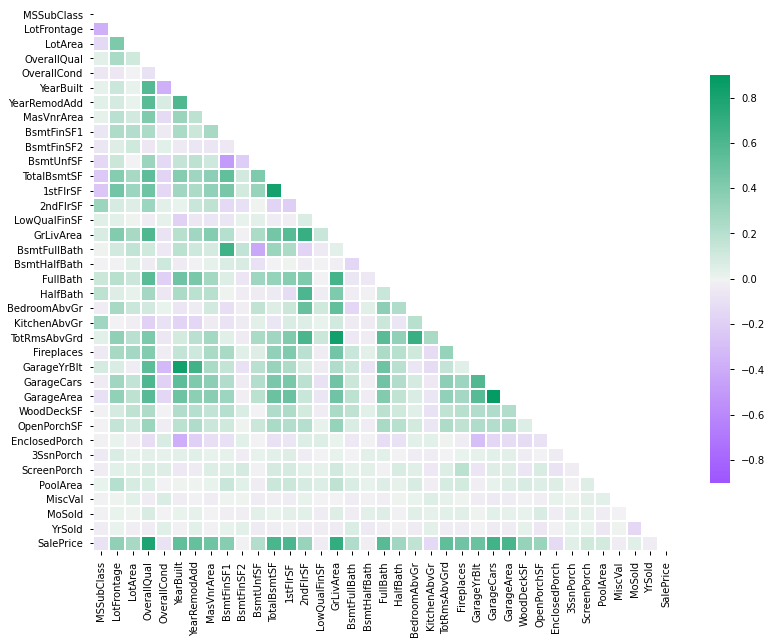

In [9]:
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
fig, ax = plt.subplots(figsize = (13, 10))
cmap = sns.diverging_palette(275, 150, s = 120, l = 55, as_cmap = True)

sns.heatmap(corr_matrix, mask = mask, cmap = cmap, vmax = 0.9, vmin = -0.9, center = 0, linewidths = 0.3, cbar_kws = {"shrink": 0.75});

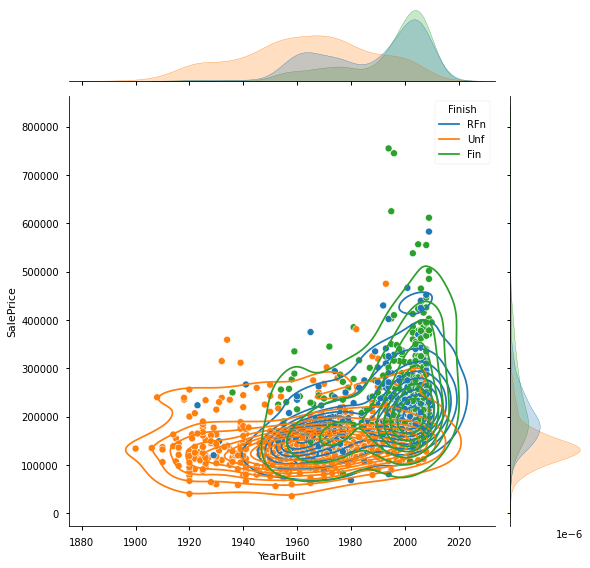

In [10]:
garage_year_df = pd.DataFrame()

garage_year_df["YearBuilt"] = df["GarageYrBlt"][df["GarageYrBlt"] != 0]
garage_year_df["Finish"] = df["GarageFinish"][df["GarageYrBlt"] != 0]
garage_year_df["SalePrice"] = df["SalePrice"][df["GarageYrBlt"] != 0]
sns.jointplot(data = garage_year_df, x = "YearBuilt", y = "SalePrice", hue = "Finish", height = 8).plot_joint(sns.kdeplot);

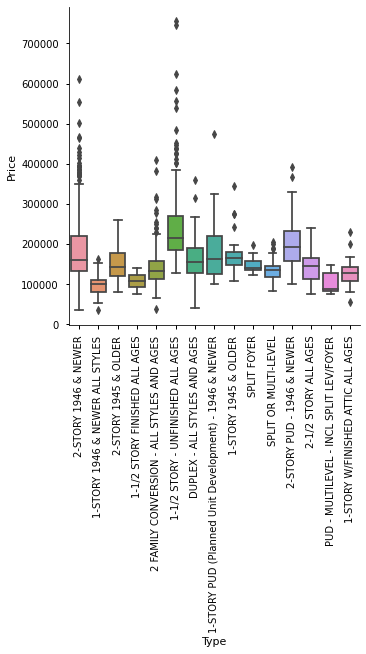

In [11]:
g1 = sns.catplot(x=df["MSSubClass"], y =df["SalePrice"], data = df, kind = "box")
g1.set_xticklabels(["2-STORY 1946 & NEWER","1-STORY 1946 & NEWER ALL STYLES","2-STORY 1945 & OLDER","1-1/2 STORY FINISHED ALL AGES","2 FAMILY CONVERSION - ALL STYLES AND AGES","1-1/2 STORY - UNFINISHED ALL AGES","DUPLEX - ALL STYLES AND AGES","1-STORY PUD (Planned Unit Development) - 1946 & NEWER","1-STORY 1945 & OLDER","SPLIT FOYER","SPLIT OR MULTI-LEVEL","2-STORY PUD - 1946 & NEWER","2-1/2 STORY ALL AGES","PUD - MULTILEVEL - INCL SPLIT LEV/FOYER","1-STORY W/FINISHED ATTIC ALL AGES"])
g1.fig.suptitle("Type of the dwelling", x = 0.6, y = 1.04)
g1.set(xlabel="Type", ylabel="Price")
plt.xticks(rotation=90);

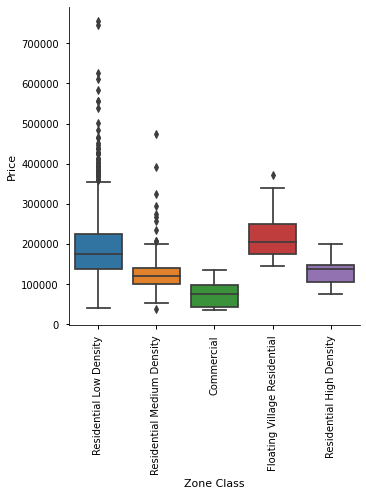

In [12]:
g2 = sns.catplot(x=df["MSZoning"], y =df["SalePrice"], data = df, kind = "box")
g2.fig.suptitle("General Zoning Classification", x = 0.6, y = 1.04)
g2.set_xticklabels(['Residential Low Density','Residential Medium Density','Commercial','Floating Village Residential',"Residential High Density"])
g2.set(xlabel="Zone Class", ylabel="Price")
plt.xticks(rotation = 90);

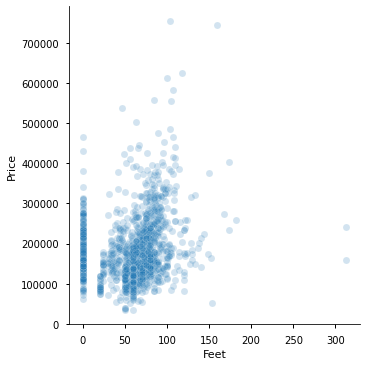

In [13]:
df["LotFrontage"].fillna(0, inplace = True)
g3 = sns.relplot(x=df["LotFrontage"], y =df["SalePrice"], data = df, kind = "scatter", alpha = 0.2)
g3.fig.suptitle("Linear Feet of Street Connected to Property", x = 0.6, y = 1.04)
g3.set(xlabel="Feet", ylabel="Price");

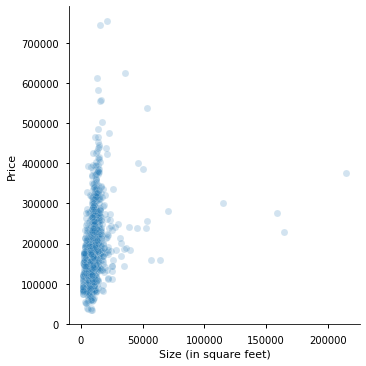

In [14]:
g4 = sns.relplot(x=df["LotArea"], y =df["SalePrice"], data = df, kind = "scatter", alpha = 0.2)
g4.fig.suptitle("Lot size", x = 0.6, y = 1.04)
g4.set(xlabel="Size (in square feet)", ylabel="Price");

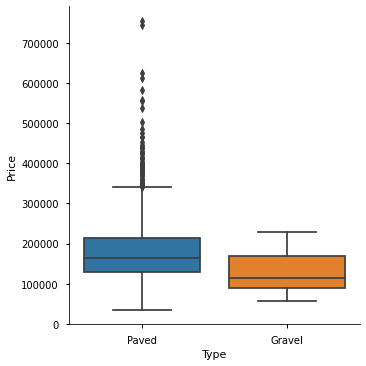

In [15]:
g5 = sns.catplot(x=df["Street"], y =df["SalePrice"], data = df, kind = "box")
g5.fig.suptitle("Type of Road Access to Property", x = 0.6, y = 1.04)
g5.set_xticklabels(["Paved","Gravel"])
g5.set(xlabel="Type", ylabel="Price");

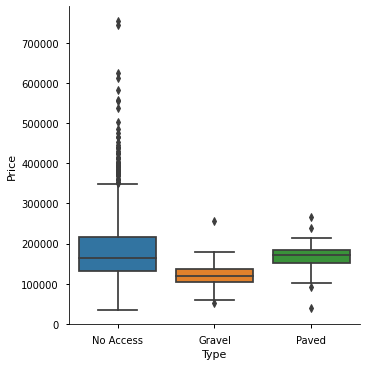

In [16]:
df["Alley"].fillna("No Access", inplace = True)
g6 = sns.catplot(x=df["Alley"], y =df["SalePrice"], data = df, kind = "box")
g6.fig.suptitle("Type of Alley Access to Property", x = 0.6, y = 1.04)
g6.set_xticklabels(["No Access","Gravel","Paved"])
g6.set(xlabel="Type", ylabel="Price");

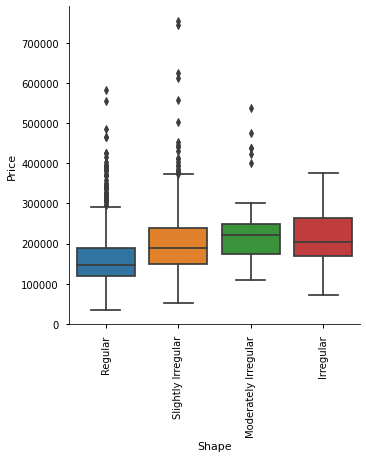

In [17]:
g7 = sns.catplot(x=df["LotShape"], y =df["SalePrice"], data = df, kind = "box")
g7.fig.suptitle("General Shape of Property", x = 0.6, y = 1.04)
g7.set_xticklabels(["Regular","Slightly Irregular","Moderately Irregular","Irregular"])
g7.set(xlabel="Shape", ylabel="Price")
plt.xticks(rotation=90);

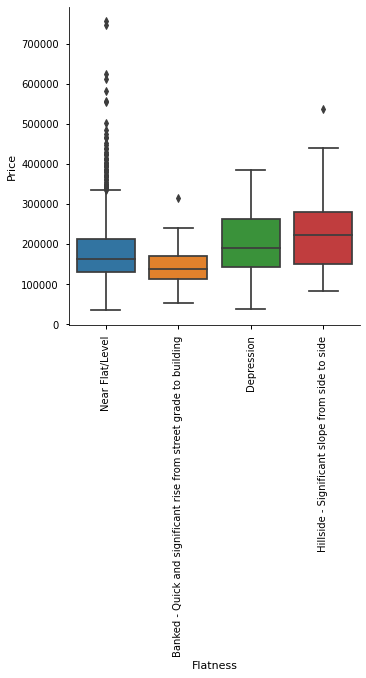

In [18]:
g8 = sns.catplot(x=df["LandContour"], y =df["SalePrice"], data = df, kind = "box")
g8.fig.suptitle("Flatness of The Property", x = 0.6, y = 1.04)
g8.set(xlabel="Flatness", ylabel="Price")
g8.set_xticklabels(["Near Flat/Level","Banked - Quick and significant rise from street grade to building","Depression","Hillside - Significant slope from side to side"])
plt.xticks(rotation=90);

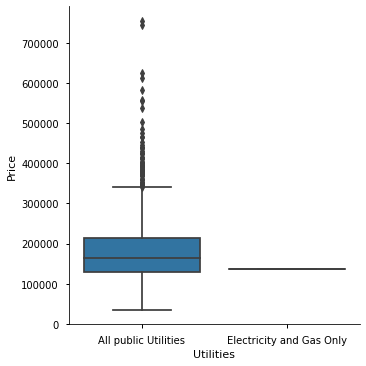

In [19]:
g9 = sns.catplot(x=df["Utilities"], y =df["SalePrice"], data = df, kind = "box")
g9.fig.suptitle("Type of Utilities Available", x = 0.6, y = 1.04)
g9.set_xticklabels(["All public Utilities","Electricity and Gas Only"])
g9.set(xlabel="Utilities", ylabel="Price");

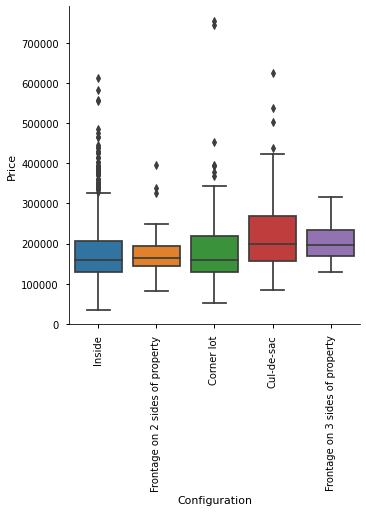

In [20]:
g10 = sns.catplot(x=df["LotConfig"], y =df["SalePrice"], data = df, kind = "box")
g10.fig.suptitle("Lot Configuration", x = 0.6, y = 1.04)
g10.set(xlabel="Configuration", ylabel="Price")
g10.set_xticklabels(["Inside","Frontage on 2 sides of property","Corner lot","Cul-de-sac","Frontage on 3 sides of property"])
plt.xticks(rotation=90);

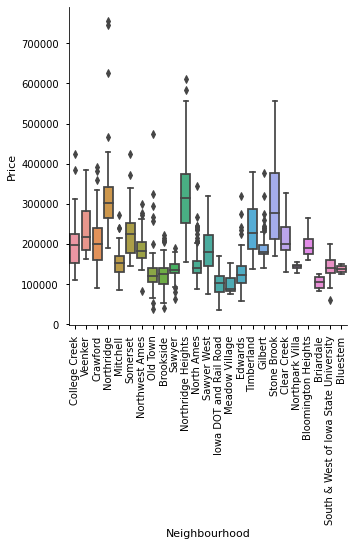

In [21]:
g12 = sns.catplot(x=df["Neighborhood"], y =df["SalePrice"], data = df, kind = "box")
g12.fig.suptitle("Physical Neighbourhood", x = 0.6, y = 1.04)
g12.set(xlabel="Neighbourhood", ylabel="Price")
g12.set_xticklabels(["College Creek","Veenker","Crawford","Northridge","Mitchell","Somerset","Northwest Ames","Old Town","Brookside","Sawyer","Northridge Heights","North Ames","Sawyer West","Iowa DOT and Rail Road","Meadow Village","Edwards","Timberland","Gilbert","Stone Brook","Clear Creek","Northpark Villa","Bloomington Heights","Briardale","South & West of Iowa State University","Bluestem"])
plt.xticks(rotation=90);

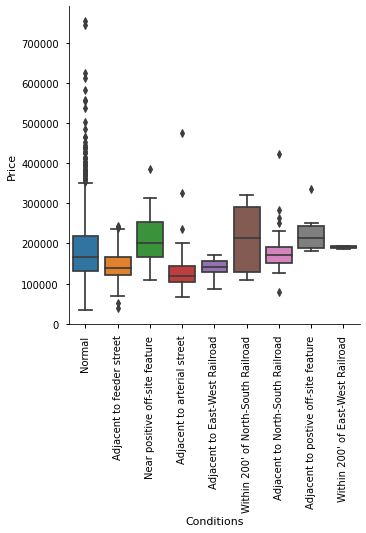

In [22]:
g13 = sns.catplot(x=df["Condition1"], y =df["SalePrice"], data = df, kind = "box")
g13.fig.suptitle("Proximity To Various Conditions", x = 0.6, y = 1.04)
g13.set(xlabel="Conditions", ylabel="Price")
g13.set_xticklabels(["Normal","Adjacent to feeder street","Near positive off-site feature","Adjacent to arterial street","Adjacent to East-West Railroad","Within 200' of North-South Railroad","Adjacent to North-South Railroad","Adjacent to postive off-site feature","Within 200' of East-West Railroad"])
plt.xticks(rotation=90);

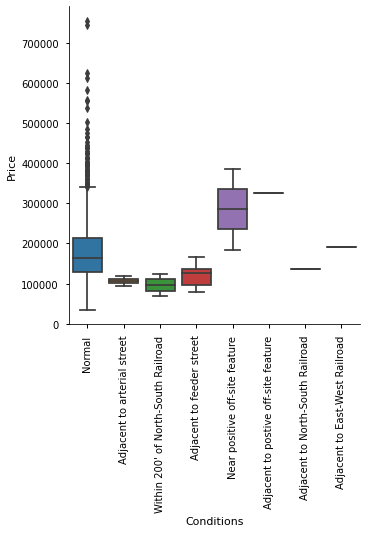

In [23]:
g14 = sns.catplot(x=df["Condition2"], y =df["SalePrice"], data = df, kind = "box")
g14.fig.suptitle("Proximity To Various Conditions (if more than one is present)", x = 0.6, y = 1.04)
g14.set(xlabel="Conditions", ylabel="Price")
g14.set_xticklabels(["Normal","Adjacent to arterial street","Within 200' of North-South Railroad","Adjacent to feeder street","Near positive off-site feature","Adjacent to postive off-site feature","Adjacent to North-South Railroad","Adjacent to East-West Railroad"])
plt.xticks(rotation=90);

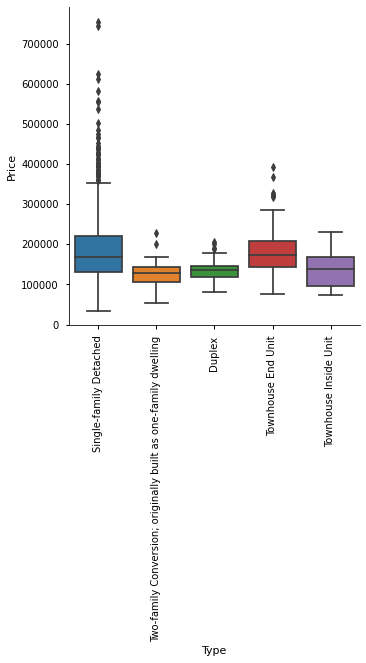

In [24]:
g15 = sns.catplot(x=df["BldgType"], y =df["SalePrice"], data = df, kind = "box")
g15.fig.suptitle("Type of Dwelling", x = 0.6, y = 1.04)
g15.set(xlabel="Type", ylabel="Price")
g15.set_xticklabels(["Single-family Detached","Two-family Conversion; originally built as one-family dwelling","Duplex","Townhouse End Unit","Townhouse Inside Unit"])
plt.xticks(rotation=90);

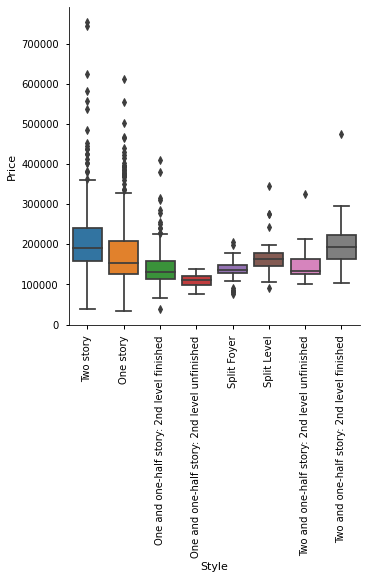

In [25]:
g16 = sns.catplot(x=df["HouseStyle"], y =df["SalePrice"], data = df, kind = "box")
g16.fig.suptitle("Style of Dwelling", x = 0.6, y = 1.04)
g16.set(xlabel="Style", ylabel="Price")
g16.set_xticklabels(["Two story","One story","One and one-half story: 2nd level finished","One and one-half story: 2nd level unfinished","Split Foyer","Split Level","Two and one-half story: 2nd level unfinished","Two and one-half story: 2nd level finished"])
plt.xticks(rotation=90);

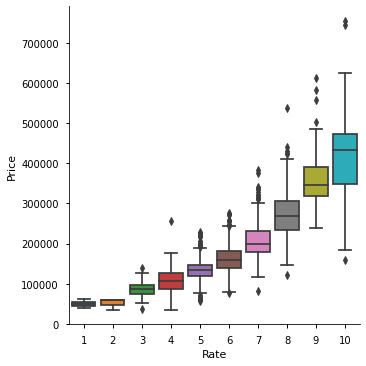

In [26]:
g17 = sns.catplot(x=df["OverallQual"], y =df["SalePrice"], data = df, kind = "box")
g17.fig.suptitle("Rates of The Overall Material of The House", x = 0.6, y = 1.04)
g17.set(xlabel="Rate", ylabel="Price");

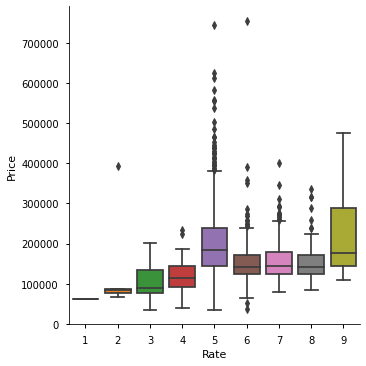

In [27]:
g18 = sns.catplot(x=df["OverallCond"], y =df["SalePrice"], data = df, kind = "box")
g18.fig.suptitle("Rates of The Overall Condition of The House", x = 0.6, y = 1.04)
g18.set(xlabel="Rate", ylabel="Price");

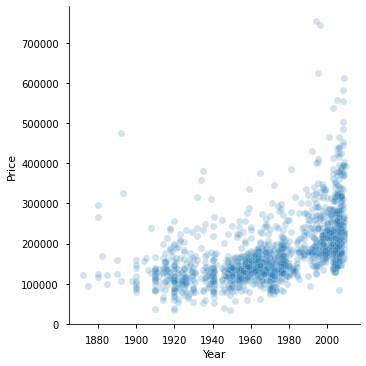

In [28]:
g19 = sns.relplot(x = df["YearBuilt"], y = df["SalePrice"], data = df, kind = "scatter", alpha = 0.2)
g19.fig.suptitle("Original Construction Date", x = 0.6, y = 1.04)
g19.set(xlabel="Year", ylabel="Price");

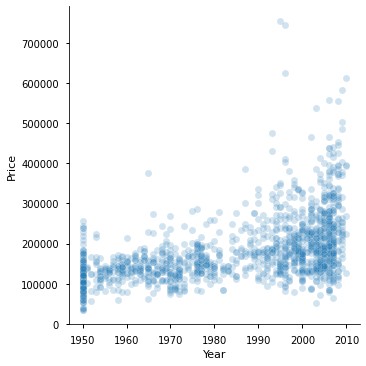

In [29]:
g20 = sns.relplot(x = df["YearRemodAdd"], y = df["SalePrice"], data = df, kind = "scatter", alpha = 0.2)
g20.fig.suptitle("Remodel Date", x = 0.6, y = 1.04)
g20.set(xlabel="Year", ylabel="Price");

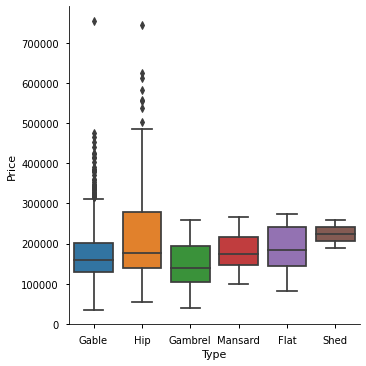

In [30]:
g21 = sns.catplot(x=df["RoofStyle"], y =df["SalePrice"], data = df, kind = "box")
g21.fig.suptitle("Type of Roof", x = 0.6, y = 1.04)
g21.set(xlabel="Type", ylabel="Price");

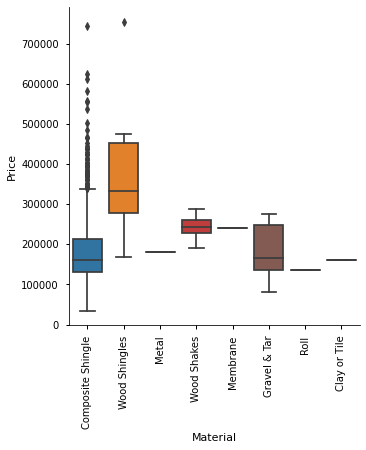

In [31]:
g22 = sns.catplot(x=df["RoofMatl"], y =df["SalePrice"], data = df, kind = "box")
g22.fig.suptitle("Roof Material", x = 0.6, y = 1.04)
g22.set(xlabel="Material", ylabel="Price")
g22.set_xticklabels(["Composite Shingle","Wood Shingles","Metal","Wood Shakes","Membrane","Gravel & Tar","Roll","Clay or Tile"])
plt.xticks(rotation=90);

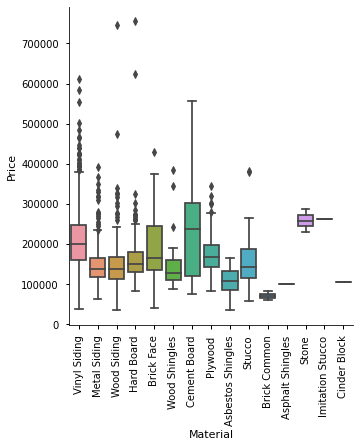

In [32]:
g23 = sns.catplot(x=df["Exterior1st"], y =df["SalePrice"], data = df, kind = "box")
g23.fig.suptitle("Exterior Covering On House", x = 0.6, y = 1.04)
g23.set(xlabel="Material", ylabel="Price")
g23.set_xticklabels(["Vinyl Siding","Metal Siding","Wood Siding","Hard Board","Brick Face","Wood Shingles","Cement Board","Plywood","Asbestos Shingles","Stucco","Brick Common","Asphalt Shingles","Stone","Imitation Stucco","Cinder Block"])
plt.xticks(rotation=90);

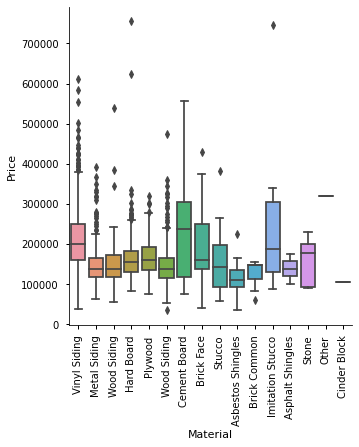

In [33]:
g24 = sns.catplot(x=df["Exterior2nd"], y =df["SalePrice"], data = df, kind = "box")
g24.fig.suptitle("Exterior Covering On House (if more than one material)", x = 0.6, y = 1.04)
g24.set(xlabel="Material", ylabel="Price")
g24.set_xticklabels(["Vinyl Siding","Metal Siding","Wood Siding","Hard Board","Plywood","Wood Siding","Cement Board","Brick Face","Stucco","Asbestos Shingles","Brick Common","Imitation Stucco","Asphalt Shingles","Stone","Other","Cinder Block"])
plt.xticks(rotation=90);

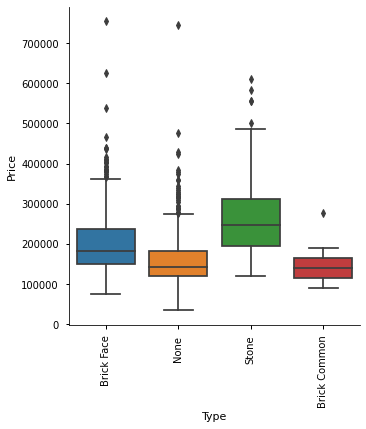

In [34]:
g25 = sns.catplot(x=df["MasVnrType"], y =df["SalePrice"], data = df, kind = "box")
g25.fig.suptitle("Masonry Veneer Type", x = 0.6, y = 1.04)
g25.set(xlabel="Type", ylabel="Price")
g25.set_xticklabels(["Brick Face","None","Stone","Brick Common"])
plt.xticks(rotation=90);

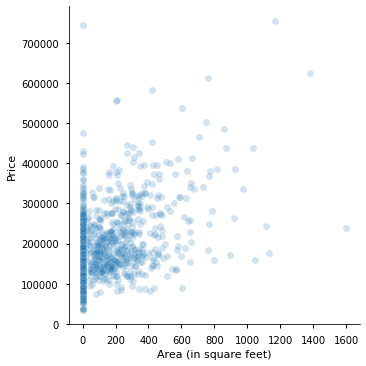

In [35]:
g26 = sns.relplot(x = df["MasVnrArea"], y = df["SalePrice"], data = df, kind = "scatter", alpha = 0.2)
g26.fig.suptitle("Masonry Veneer Area", x = 0.6, y = 1.04)
g26.set(xlabel="Area (in square feet)", ylabel="Price");

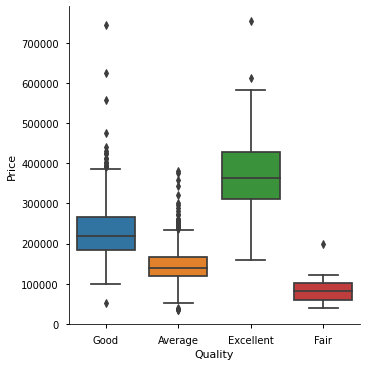

In [36]:
g27 = sns.catplot(x=df["ExterQual"], y =df["SalePrice"], data = df, kind = "box")
g27.fig.suptitle("The Quality of The Material On The Exterior", x = 0.6, y = 1.04)
g27.set(xlabel="Quality", ylabel="Price")
g27.set_xticklabels(["Good","Average","Excellent","Fair"]);

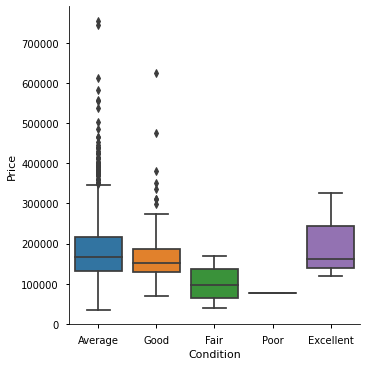

In [37]:
g28 = sns.catplot(x=df["ExterCond"], y =df["SalePrice"], data = df, kind = "box")
g28.fig.suptitle("The Condition of The Material On The Exterior", x = 0.6, y = 1.04)
g28.set(xlabel="Condition", ylabel="Price")
g28.set_xticklabels(["Average","Good","Fair","Poor","Excellent"]);

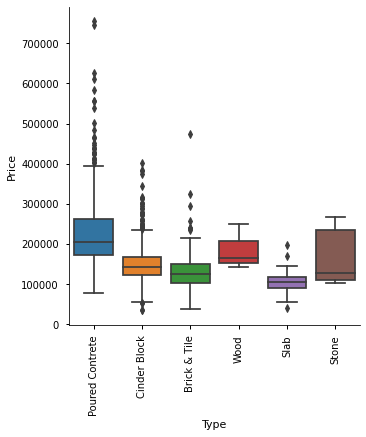

In [38]:
g29 = sns.catplot(x=df["Foundation"], y =df["SalePrice"], data = df, kind = "box")
g29.fig.suptitle("Type of Foundation", x = 0.6, y = 1.04)
g29.set(xlabel="Type", ylabel="Price")
g29.set_xticklabels(["Poured Contrete","Cinder Block","Brick & Tile","Wood","Slab","Stone"])
plt.xticks(rotation=90);

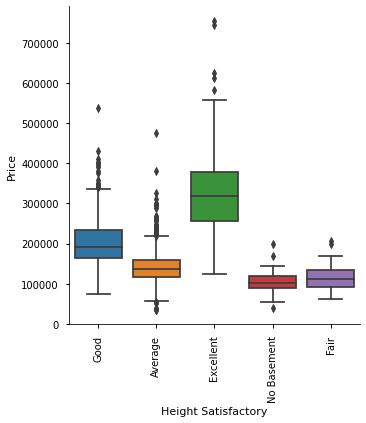

In [39]:
df["BsmtQual"].fillna("No Basement", inplace = True)
g30 = sns.catplot(x=df["BsmtQual"], y =df["SalePrice"], data = df, kind = "box")
g30.fig.suptitle("The Height of The Basement", x = 0.6, y = 1.04)
g30.set(xlabel="Height Satisfactory", ylabel="Price")
g30.set_xticklabels(["Good","Average","Excellent","No Basement","Fair"])
plt.xticks(rotation=90);

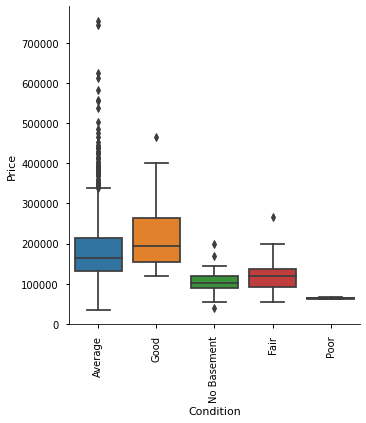

In [40]:
df["BsmtCond"].fillna("No Basement", inplace = True)
g31 = sns.catplot(x=df["BsmtCond"], y =df["SalePrice"], data = df, kind = "box")
g31.fig.suptitle("The Condition of The Basement", x = 0.6, y = 1.04)
g31.set(xlabel="Condition", ylabel="Price")
g31.set_xticklabels(["Average","Good","No Basement","Fair","Poor"])
plt.xticks(rotation=90);

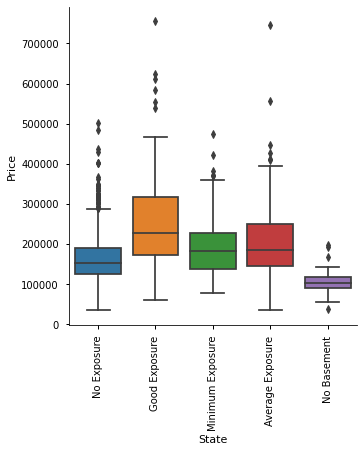

In [41]:
df["BsmtExposure"].fillna("No Basement", inplace = True)
g32 = sns.catplot(x=df["BsmtExposure"], y =df["SalePrice"], data = df, kind = "box")
g32.fig.suptitle("Walkout or Garden Level Walls", x = 0.6, y = 1.04)
g32.set(xlabel="State", ylabel="Price")
g32.set_xticklabels(["No Exposure","Good Exposure","Minimum Exposure","Average Exposure","No Basement"])
plt.xticks(rotation=90);

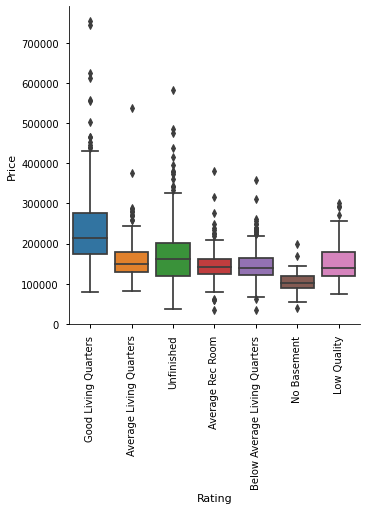

In [42]:
df["BsmtFinType1"].fillna("No Basement", inplace = True)
g33 = sns.catplot(x=df["BsmtFinType1"], y =df["SalePrice"], data = df, kind = "box")
g33.fig.suptitle("Rating of Basement Finished Area (First)", x = 0.6, y = 1.04)
g33.set(xlabel="Rating", ylabel="Price")
g33.set_xticklabels(["Good Living Quarters","Average Living Quarters","Unfinished","Average Rec Room","Below Average Living Quarters","No Basement","Low Quality"])
plt.xticks(rotation=90);

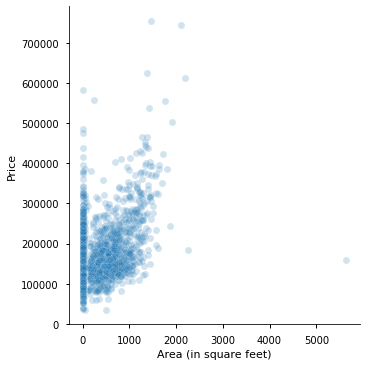

In [43]:
g34 = sns.relplot(x = df["BsmtFinSF1"], y = df["SalePrice"], data = df, kind = "scatter", alpha = 0.2)
g34.fig.suptitle("First Basement Finished Area", x = 0.6, y = 1.04)
g34.set(xlabel="Area (in square feet)", ylabel="Price");

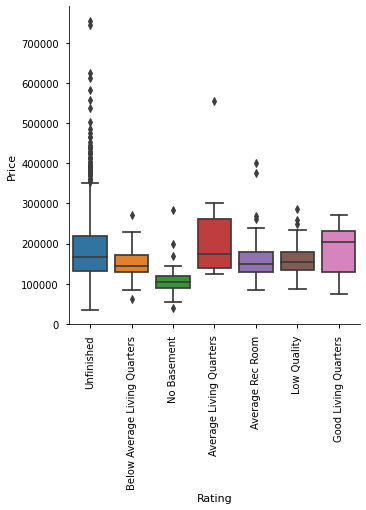

In [44]:
df["BsmtFinType2"].fillna("No Basement", inplace = True)
g35 = sns.catplot(x=df["BsmtFinType2"], y =df["SalePrice"], data = df, kind = "box")
g35.fig.suptitle("Rating of Basement Finished Area (If Multiple Types)", x = 0.6, y = 1.04)
g35.set(xlabel="Rating", ylabel="Price")
g35.set_xticklabels(["Unfinished","Below Average Living Quarters","No Basement","Average Living Quarters","Average Rec Room","Low Quality","Good Living Quarters"])
plt.xticks(rotation=90);

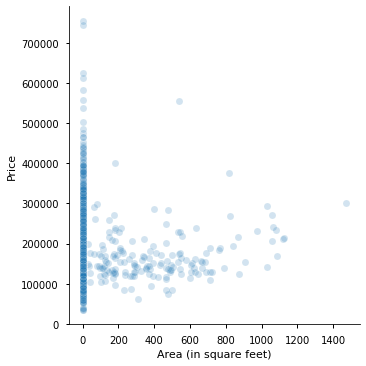

In [45]:
g36 = sns.relplot(x = df["BsmtFinSF2"], y = df["SalePrice"], data = df, kind = "scatter", alpha = 0.2)
g36.fig.suptitle("Multiple Basement Finished Area", x = 0.6, y = 1.04)
g36.set(xlabel="Area (in square feet)", ylabel="Price");

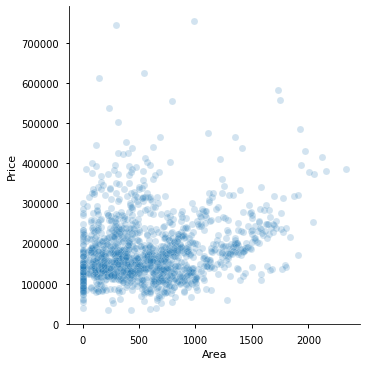

In [46]:
g37 = sns.relplot(x = df["BsmtUnfSF"], y = df["SalePrice"], data = df, kind = "scatter", alpha = 0.2)
g37.fig.suptitle("Unfinished Square Feet of Basement Area", x = 0.6, y = 1.04)
g37.set(xlabel="Area", ylabel="Price");

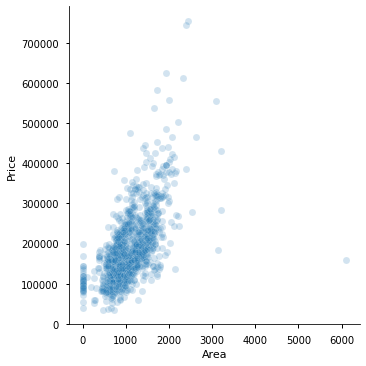

In [47]:
g38 = sns.relplot(x = df["TotalBsmtSF"], y = df["SalePrice"], data = df, kind = "scatter", alpha = 0.2)
g38.fig.suptitle("Total Square Feet of Basement Area", x = 0.6, y = 1.04)
g38.set(xlabel="Area", ylabel="Price");

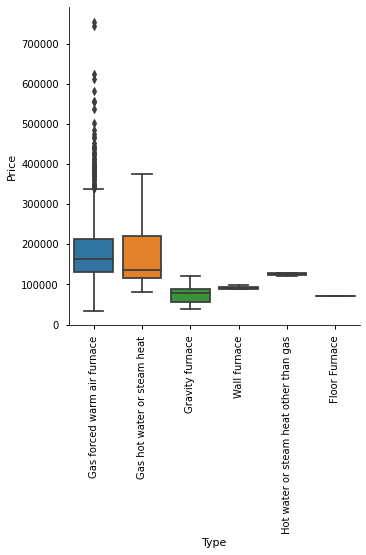

In [48]:
g33 = sns.catplot(x=df["Heating"], y =df["SalePrice"], data = df, kind = "box")
g33.fig.suptitle("Type of heating", x = 0.6, y = 1.04)
g33.set(xlabel="Type", ylabel="Price")
g33.set_xticklabels(["Gas forced warm air furnace","Gas hot water or steam heat","Gravity furnace", "Wall furnace","Hot water or steam heat other than gas","Floor Furnace"])
plt.xticks(rotation=90);

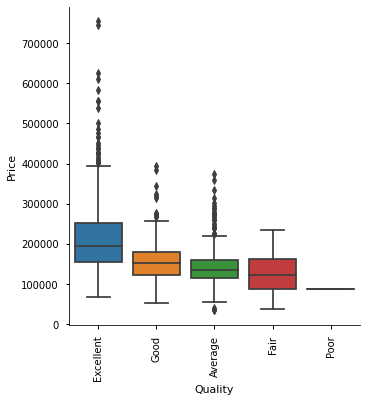

In [49]:
g33 = sns.catplot(x=df["HeatingQC"], y =df["SalePrice"], data = df, kind = "box")
g33.fig.suptitle("Type of heating", x = 0.6, y = 1.04)
g33.set(xlabel="Quality", ylabel="Price")
g33.set_xticklabels(["Excellent", "Good", "Average", "Fair", "Poor"])
plt.xticks(rotation=90);

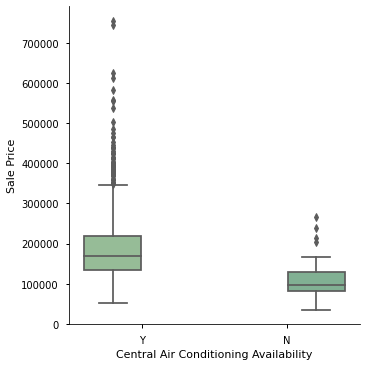

In [50]:
sns.set_palette("crest", 12)
a41 = sns.catplot(x = "CentralAir",y = "SalePrice", hue = "CentralAir", data = df, kind = "box")
a41.fig.suptitle("Central Air Conditioning", x = 0.5, y = 1.03)
a41.set(xlabel = "Central Air Conditioning Availability", ylabel = "Sale Price");

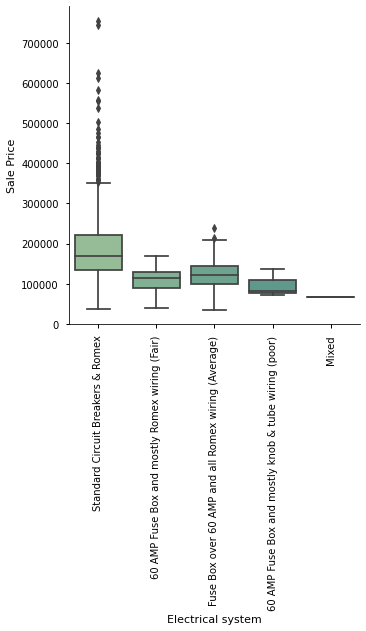

In [51]:
a42 = sns.catplot(x = df["Electrical"], y = df["SalePrice"], data = df, kind = "box")
a42.set_xticklabels(['Standard Circuit Breakers & Romex','60 AMP Fuse Box and mostly Romex wiring (Fair)','Fuse Box over 60 AMP and all Romex wiring (Average)','60 AMP Fuse Box and mostly knob & tube wiring (poor)', "Mixed"])
a42.fig.suptitle("Electrical System Type", x = 0.5, y = 1.03)
a42.set(xlabel = "Electrical system", ylabel = "Sale Price")
plt.xticks(rotation = 90);

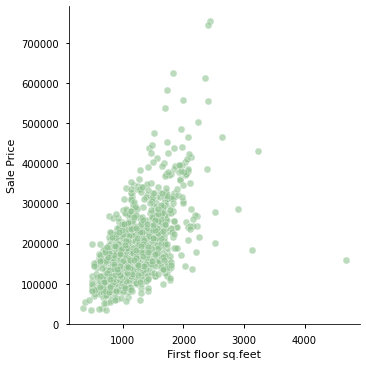

In [52]:
#1stFlrSF (first floor square feet) vs SalePrice
a43 = sns.relplot(x = "1stFlrSF", y = "SalePrice", data = df, kind = "scatter", alpha = 0.6)
a43.set(xlabel = "First floor sq.feet", ylabel = "Sale Price")
a43.fig.suptitle("First Floor square feet", x = 0.5, y = 1.03)
a43;

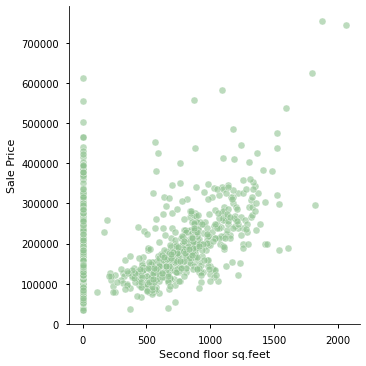

In [53]:
#2ndFlrSF (second floor square feet) vs SalePrice
a44 = sns.relplot(x = "2ndFlrSF", y = "SalePrice", data = df, kind = "scatter", alpha = 0.6)
a44.set(xlabel = "Second floor sq.feet", ylabel = "Sale Price")
a44.fig.suptitle("Second Floor square feet", x = 0.5, y = 1.03)
a44;

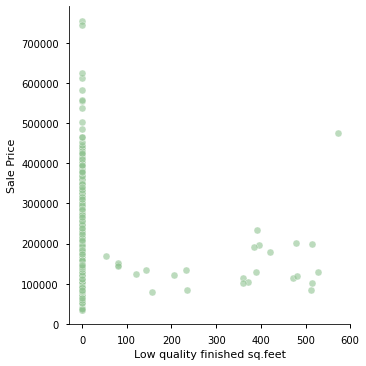

In [54]:
#LowQualFinSF (Low quality finished square feet) vs SalePrice
a45 = sns.relplot(x = "LowQualFinSF", y = "SalePrice", data = df, kind = "scatter", alpha = 0.6)
a45.set(xlabel = "Low quality finished sq.feet", ylabel = "Sale Price")
a45.fig.suptitle("Low Quality Finished square feet", x = 0.5, y = 1.03)
a45;

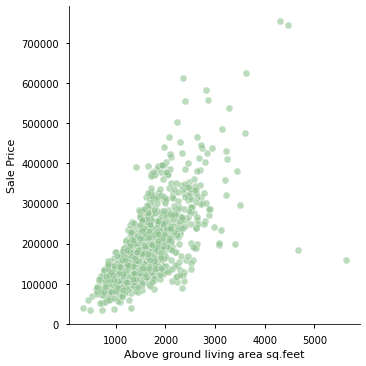

In [55]:
#GrLivArea (above ground living area) vs SalePrice
a46 = sns.relplot(x = "GrLivArea", y = "SalePrice", data = df, kind = "scatter", alpha = 0.6)
a46.set(xlabel = "Above ground living area sq.feet", ylabel = "Sale Price")
a46.fig.suptitle("Above Ground Living Area square feet", x = 0.5, y = 1.03)
a46;

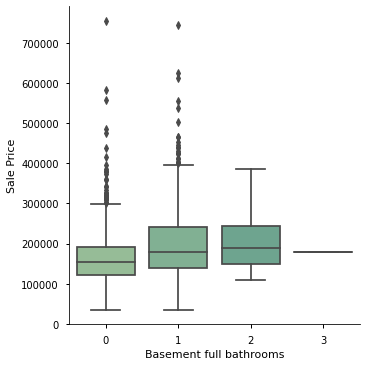

In [56]:
#BsmtFullBath (Basement full bathrooms) vs SalePrice
a47 = sns.catplot(x = "BsmtFullBath", y = "SalePrice", data = df, kind = "box")
a47.set(xlabel = "Basement full bathrooms", ylabel = "Sale Price")
a47.fig.suptitle("Basement Full Bathrooms", x = 0.5, y = 1.03)
a47;

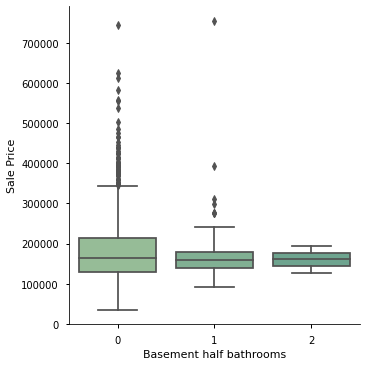

In [57]:
#BsmtHalfBath (Basement half bathrooms) vs SalePrice
a48 = sns.catplot(x = "BsmtHalfBath", y = "SalePrice", data = df, kind = "box")
a48.set(xlabel = "Basement half bathrooms", ylabel = "Sale Price")
a48.fig.suptitle("Basement Half Bathrooms", x = 0.5, y = 1.03)
a48;

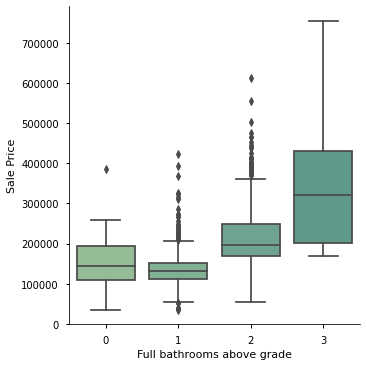

In [58]:
#FullBath (Full bathrooms above grade) vs SalePrice
a49 = sns.catplot(x = "FullBath", y = "SalePrice", data = df, kind = "box")
a49.set(xlabel = "Full bathrooms above grade", ylabel = "Sale Price")
a49.fig.suptitle("Full Bathrooms Above Grade", x = 0.5, y = 1.03)
a49;

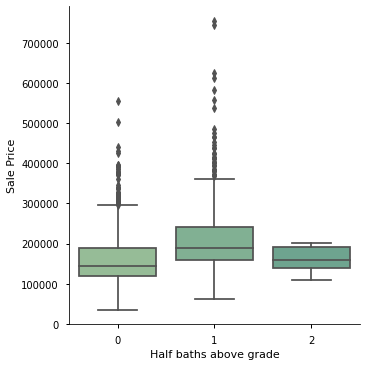

In [59]:
#HalfBath (Half baths above grade) vs SalePrice
a50 = sns.catplot(x = "HalfBath", y = "SalePrice", data = df, kind = "box")
a50.set(xlabel = "Half baths above grade", ylabel = "Sale Price")
a50.fig.suptitle("Half Bathrooms Above Grade", x = 0.5, y = 1.03)
a50;

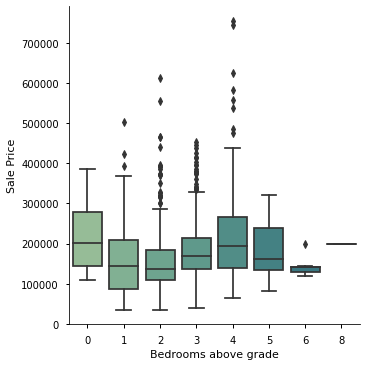

In [60]:
#BedroomAbvGr (Bedrooms above grade (does NOT include basement bedrooms)) vs SalePrice
a51 = sns.catplot(x = "BedroomAbvGr", y = "SalePrice", data = df, kind = "box")
a51.set(xlabel = "Bedrooms above grade", ylabel = "Sale Price")
a51.fig.suptitle("Bedrooms Above Grade", x = 0.5, y = 1.03)
a51;

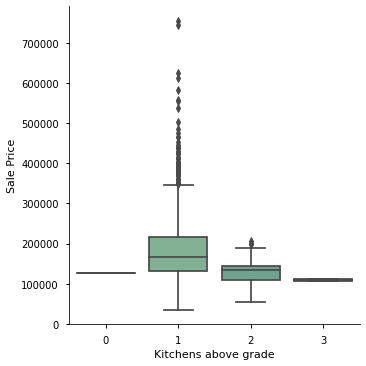

In [61]:
#KitchenAbvGr (Kitchens above grade) vs SalePrice
a52 = sns.catplot(x = "KitchenAbvGr", y = "SalePrice", data = df, kind = "box")
a52.set(xlabel = "Kitchens above grade", ylabel = "Sale Price")
a52.fig.suptitle("Kitchens Above Grade", x = 0.5, y = 1.03)
a52;

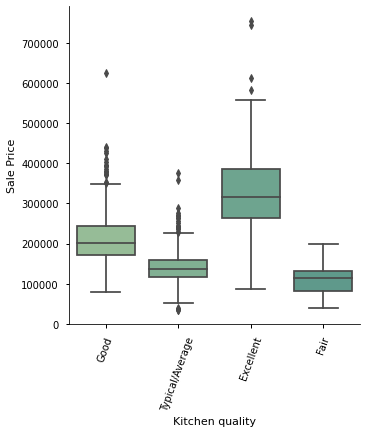

In [62]:
#KitchenQual (Kitchen Quality) vs SalePrice
a53 = sns.catplot(x = "KitchenQual", y = "SalePrice", data = df, kind = "box")
a53.set(xlabel = "Kitchen quality", ylabel = "Sale Price")
a53.set_xticklabels(['Good','Typical/Average','Excellent','Fair'])
a53.fig.suptitle("Kitchen Quality", x = 0.5, y = 1.03)
plt.xticks(rotation = 70)
a53;

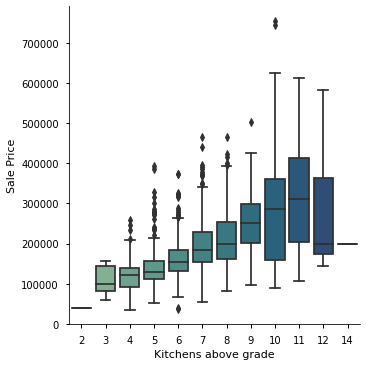

In [63]:
#TotRmsAbvGrd (Total Rooms above grade) vs SalePrice
a54 = sns.catplot(x = "TotRmsAbvGrd", y = "SalePrice", data = df, kind = "box")
a54.set(xlabel = "Kitchens above grade", ylabel = "Sale Price")
a54.fig.suptitle("Kitchens Above Grade", x = 0.5, y = 1.03)
a54;

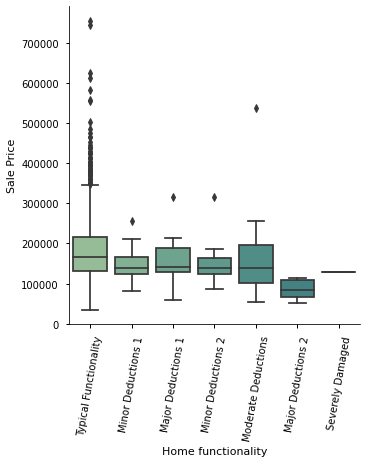

In [64]:
#Functional vs SalesPrice
a55 = sns.catplot(x = "Functional", y = "SalePrice", data = df, kind = "box")
a55.set(xlabel = "Home functionality", ylabel = "Sale Price")
a55.fig.suptitle("Home Functionality", x = 0.5, y = 1.03)
a55.set_xticklabels(['Typical Functionality','Minor Deductions 1','Major Deductions 1','Minor Deductions 2', 'Moderate Deductions', 'Major Deductions 2', 'Severely Damaged'])
plt.xticks(rotation = 80)
a55;

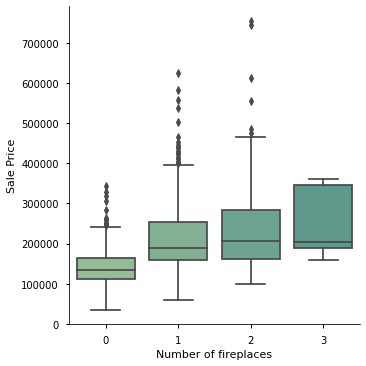

In [65]:
#Fireplaces vs SalePrice
a56 = sns.catplot(x = "Fireplaces", y = "SalePrice", data = df, kind = "box")
a56.set(xlabel = "Number of fireplaces", ylabel = "Sale Price")
a56.fig.suptitle("Number of Fireplaces", x = 0.5, y = 1.03)
a56;

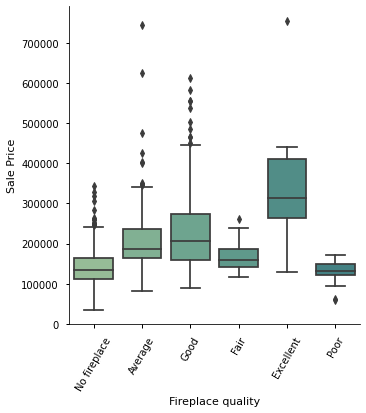

In [66]:
#FireplaceQu vs SalePrice
df_nonnulled = df.fillna("None")
a57 = sns.catplot(x = "FireplaceQu", y = "SalePrice", data = df_nonnulled, kind = "box")
a57.set(xlabel = "Fireplace quality", ylabel = "Sale Price")
a57.fig.suptitle("Fireplace Quality", x = 0.5, y = 1.03)
a57.set_xticklabels(['No fireplace', 'Average', 'Good', 'Fair', 'Excellent', 'Poor'])
plt.xticks(rotation=60)
a57;

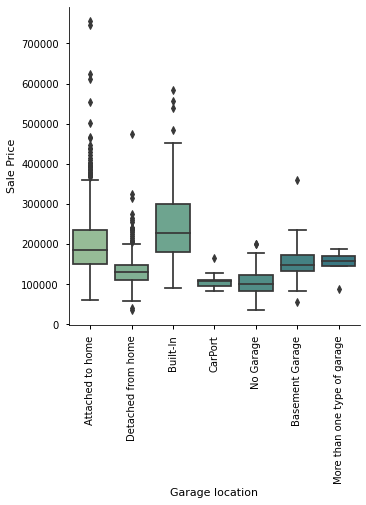

In [67]:
#GarageType vs SalePrice
a58 = sns.catplot(x = "GarageType", y = "SalePrice", data = df_nonnulled, kind = "box")
a58.set(xlabel = "Garage location", ylabel = "Sale Price")
a58.fig.suptitle("Garage Location", x = 0.5, y = 1.03)
a58.set_xticklabels(['Attached to home', 'Detached from home', 'Built-In', 'CarPort', 'No Garage', 'Basement Garage', 'More than one type of garage'])
plt.xticks(rotation=90)
a58;

Number of missing values: 81


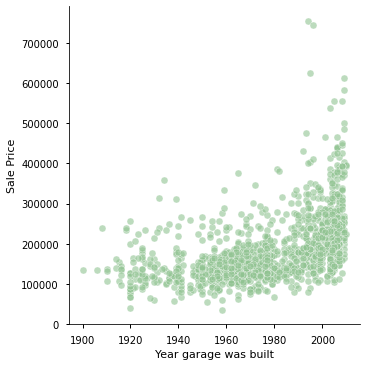

In [68]:
#GarageYrBlt vs SalePrice
df_nonnulled['GarageYrBlt'] = pd.to_numeric(df_nonnulled['GarageYrBlt'], errors = 'coerce')
a59 = sns.relplot(x = "GarageYrBlt", y = "SalePrice", data = df_nonnulled, kind = "scatter", alpha = 0.6)
a59.set(xlabel = "Year garage was built", ylabel = "Sale Price")
a59.fig.suptitle("Year Garage Was Built", x = 0.5, y = 1.03)
a59;
print("Number of missing values: " + str(df_nonnulled["GarageYrBlt"].isnull().sum()))

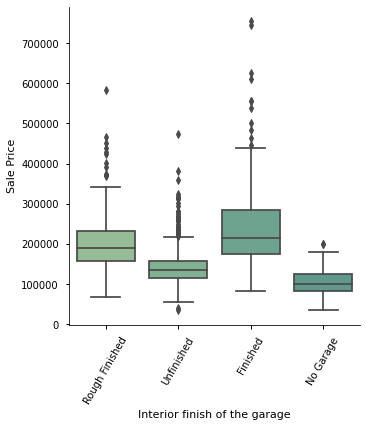

In [69]:
#GarageFinish vs SalePrice
a60 = sns.catplot(x = "GarageFinish", y = "SalePrice", data = df_nonnulled, kind = "box")
a60.set(xlabel = "Interior finish of the garage", ylabel = "Sale Price")
a60.fig.suptitle("Interior Finish of The Garage", x = 0.5, y = 1.03)
a60.set_xticklabels(['Rough Finished', 'Unfinished', 'Finished', 'No Garage'])
plt.xticks(rotation=60)
a60;

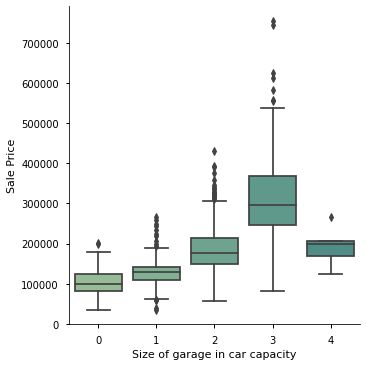

In [70]:
#GarageCars vs SalePrice
a61 = sns.catplot(x = "GarageCars", y = "SalePrice", data = df_nonnulled, kind = "box")
a61.set(xlabel = "Size of garage in car capacity", ylabel = "Sale Price")
a61.fig.suptitle("Size of Garage in Car Capacity", x = 0.5, y = 1.03)
a61;

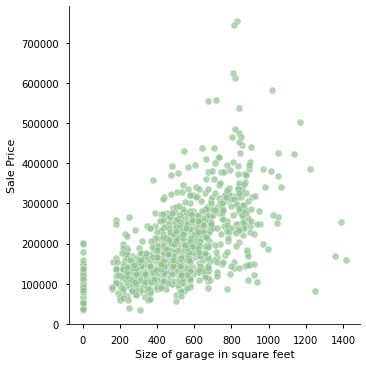

In [71]:
#GarageArea vs SalePrice
a62 = sns.relplot(x = "GarageArea", y = "SalePrice", data = df_nonnulled, kind = "scatter", alpha = 0.7)
a62.set(xlabel = "Size of garage in square feet", ylabel = "Sale Price")
a62.fig.suptitle("Size of Garage in Square Feet", x = 0.5, y = 1.03)
a62;

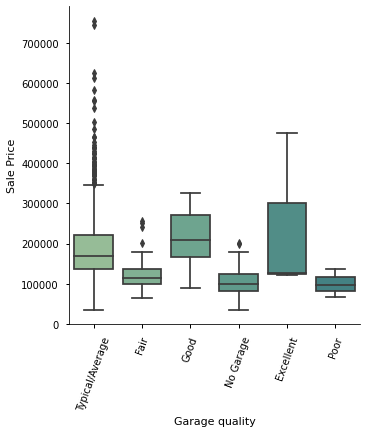

In [72]:
#GarageQual vs SalePrice
a63 = sns.catplot(x = "GarageQual", y = "SalePrice", data = df_nonnulled, kind = "box")
a63.set(xlabel = "Garage quality", ylabel = "Sale Price")
a63.fig.suptitle("Garage Quality", x = 0.5, y = 1.03)
a63.set_xticklabels(['Typical/Average', 'Fair', 'Good', 'No Garage', 'Excellent', 'Poor'])
plt.xticks(rotation=70)
a63;

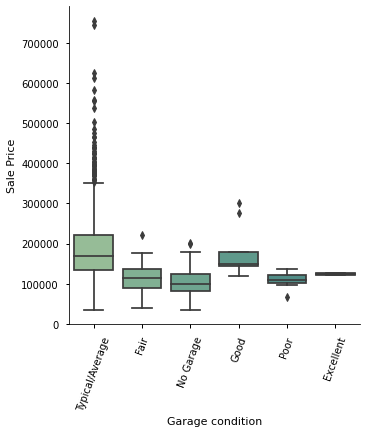

In [73]:
#GarageCond vs SalePrice
a64 = sns.catplot(x = "GarageCond", y = "SalePrice", data = df_nonnulled, kind = "box")
a64.set(xlabel = "Garage condition", ylabel = "Sale Price")
a64.fig.suptitle("Garage Condition", x = 0.5, y = 1.03)
a64.set_xticklabels(['Typical/Average', 'Fair', 'No Garage', 'Good', 'Poor', 'Excellent'])
plt.xticks(rotation=70)
a64;

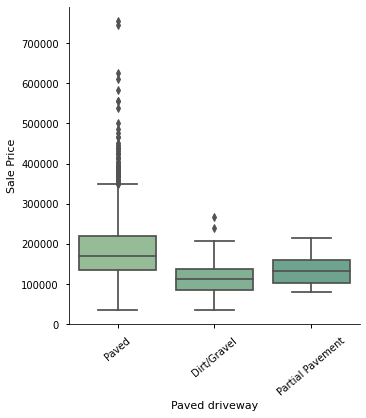

In [74]:
#PavedDrive vs SalePrice
a65 = sns.catplot(x = "PavedDrive", y = "SalePrice", data = df_nonnulled, kind = "box")
a65.set(xlabel = "Paved driveway", ylabel = "Sale Price")
a65.fig.suptitle("Paved Driveway", x = 0.5, y = 1.03)
a65.set_xticklabels(['Paved', 'Dirt/Gravel', 'Partial Pavement'])
plt.xticks(rotation=40)
a65;

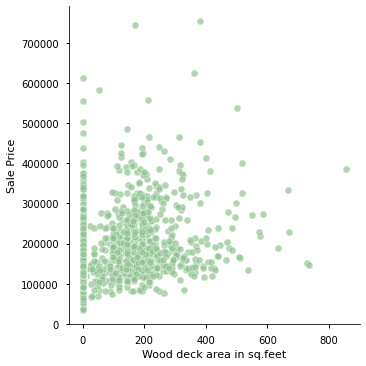

In [75]:
#WoodDeckSF vs SalePrice
a66 = sns.relplot(x = "WoodDeckSF", y = "SalePrice", data = df_nonnulled, kind = "scatter", alpha = 0.7)
a66.set(xlabel = "Wood deck area in sq.feet", ylabel = "Sale Price")
a66.fig.suptitle("Wood Deck Area in Square Feet", x = 0.5, y = 1.03)
a66;

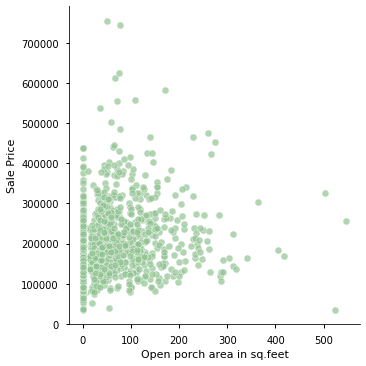

In [76]:
#OpenPorchSF vs SalePrice
a67 = sns.relplot(x = "OpenPorchSF", y = "SalePrice", data = df_nonnulled, kind = "scatter", alpha = 0.7)
a67.set(xlabel = "Open porch area in sq.feet", ylabel = "Sale Price")
a67.fig.suptitle("Open Porch Area in Square Feet", x = 0.5, y = 1.03)
a67;

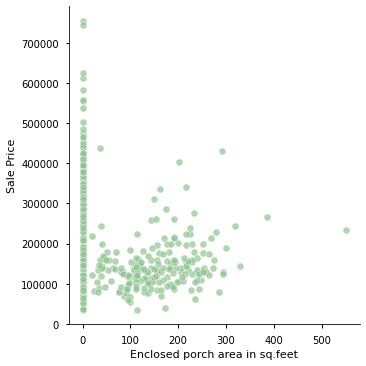

In [77]:
#EnclosedPorch vs SalePrice
a68 = sns.relplot(x = "EnclosedPorch", y = "SalePrice", data = df_nonnulled, kind = "scatter", alpha = 0.7)
a68.set(xlabel = "Enclosed porch area in sq.feet", ylabel = "Sale Price")
a68.fig.suptitle("Enclosed Porch Area in Square feet", x = 0.5, y = 1.03)
a68;

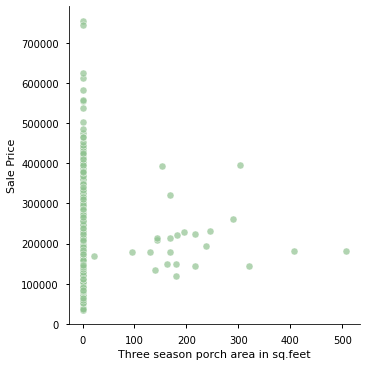

In [78]:
#3SsnPorch vs SalePrice
a69 = sns.relplot(x = "3SsnPorch", y = "SalePrice", data = df_nonnulled, kind = "scatter", alpha = 0.7)
a69.set(xlabel = "Three season porch area in sq.feet", ylabel = "Sale Price")
a69.fig.suptitle("Three Season Porch Area in Square Feet", x = 0.5, y = 1.03)
a69;

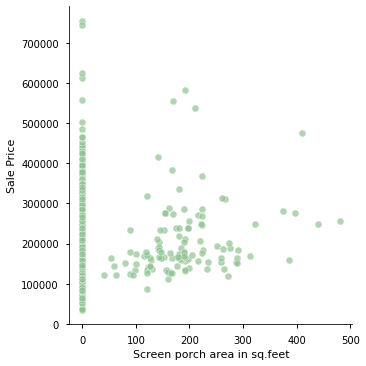

In [79]:
#ScreenPorch vs SalePrice
a70 = sns.relplot(x = "ScreenPorch", y = "SalePrice", data = df_nonnulled, kind = "scatter", alpha = 0.7)
a70.set(xlabel = "Screen porch area in sq.feet", ylabel = "Sale Price")
a70.fig.suptitle("Screen Porch Area in square feet", x = 0.5, y = 1.03)
a70;

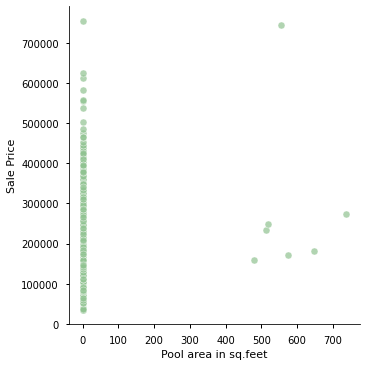

In [80]:
#PoolArea vs SalePrice
a71 = sns.relplot(x = "PoolArea", y = "SalePrice", data = df_nonnulled, kind = "scatter", alpha = 0.7)
a71.set(xlabel = "Pool area in sq.feet", ylabel = "Sale Price")
a71.fig.suptitle("Pool Area in Square Feet", x = 0.5, y = 1.03)
a71;

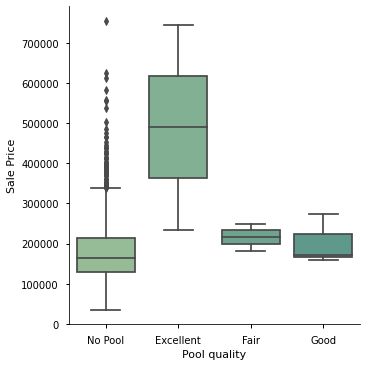

In [81]:
#PoolQC vs SalePrice
a72 = sns.catplot(x = "PoolQC", y = "SalePrice", data = df_nonnulled, kind = "box")
a72.set(xlabel = "Pool quality", ylabel = "Sale Price")
a72.fig.suptitle("Pool Quality", x = 0.5, y = 1.03)
a72.set_xticklabels(['No Pool', 'Excellent', 'Fair', 'Good'])
a72;

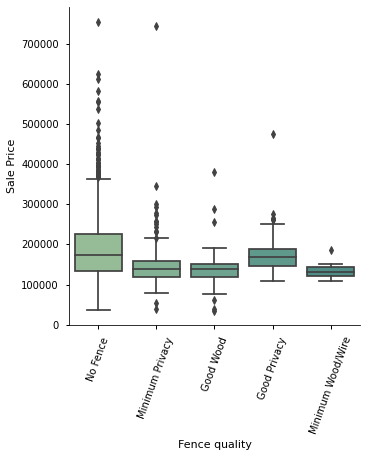

In [82]:
#Fence vs SalePrice
a73 = sns.catplot(x = "Fence", y = "SalePrice", data = df_nonnulled, kind = "box")
a73.set(xlabel = "Fence quality", ylabel = "Sale Price")
a73.fig.suptitle("Fence Quality", x = 0.5, y = 1.03)

# Very grotesque, why consider wood quality and privacy as a single feature??
a73.set_xticklabels(['No Fence', 'Minimum Privacy', 'Good Wood', 'Good Privacy', 'Minimum Wood/Wire'])
plt.xticks(rotation = 70)
a73;

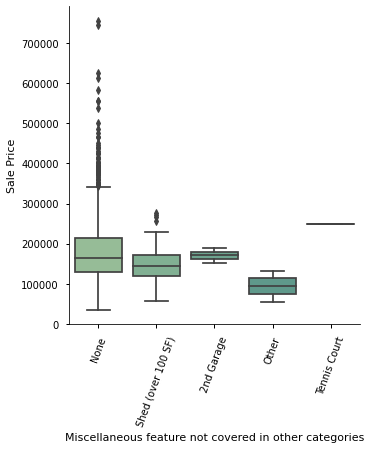

In [83]:
#MiscFeature vs SalePrice
a74 = sns.catplot(x = "MiscFeature", y = "SalePrice", data = df_nonnulled, kind = "box")
a74.set(xlabel = "Miscellaneous feature not covered in other categories", ylabel = "Sale Price")
a74.fig.suptitle("Miscellaneous Feature Not Covered in Other Categories", x = 0.7, y = 1.03)
a74.set_xticklabels(['None', 'Shed (over 100 SF)', '2nd Garage', 'Other', 'Tennis Court'])
plt.xticks(rotation = 70)
a74;

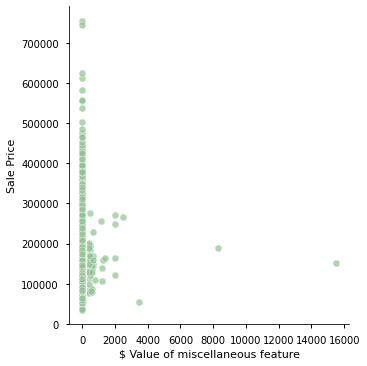

In [84]:
#MiscVal vs SalePrice
a75 = sns.relplot(x = "MiscVal", y = "SalePrice", data = df_nonnulled, kind = "scatter", alpha = 0.7)
a75.set(xlabel = "$ Value of miscellaneous feature", ylabel = "Sale Price")
a75.fig.suptitle("$ Value of Miscellaneous Feature", x = 0.6, y = 1.03)
a75;

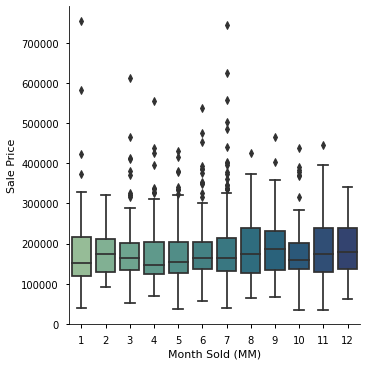

In [85]:
#MoSold vs SalePrice
a76 = sns.catplot(x = "MoSold", y = "SalePrice", data = df_nonnulled, kind = "box")
a76.set(xlabel = "Month Sold (MM)", ylabel = "Sale Price")
a76.fig.suptitle("Month Sold", x = 0.5, y = 1.03)
a76;

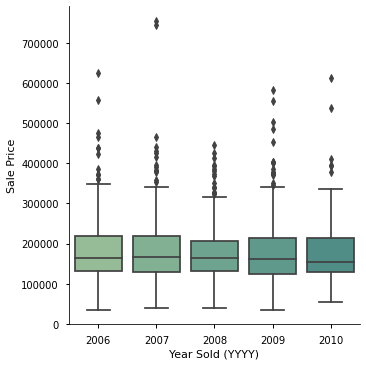

In [86]:
#YrSold vs SalePrice
a77 = sns.catplot(x = "YrSold", y = "SalePrice", data = df_nonnulled, kind = "box")
a77.set(xlabel = "Year Sold (YYYY)", ylabel = "Sale Price")
a77.fig.suptitle("Year Sold", x = 0.5, y = 1.03)
a77;

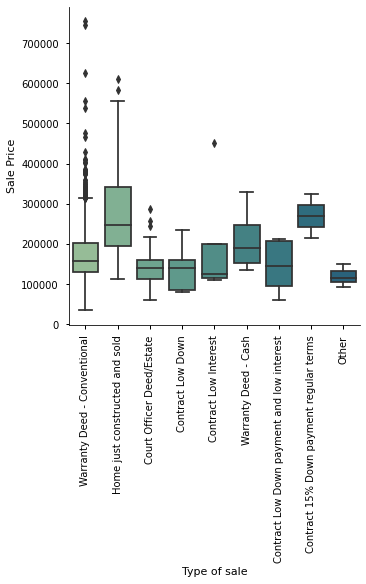

In [87]:
#SaleType vs SalePrice
a78 = sns.catplot(x = "SaleType", y = "SalePrice", data = df_nonnulled, kind = "box")
a78.set(xlabel = "Type of sale", ylabel = "Sale Price")
a78.fig.suptitle("Type of Sale", x = 0.5, y = 1.03)
a78.set_xticklabels(['Warranty Deed - Conventional', 'Home just constructed and sold', 'Court Officer Deed/Estate', 'Contract Low Down', 'Contract Low Interest', 'Warranty Deed - Cash', 'Contract Low Down payment and low interest', 'Contract 15% Down payment regular terms', 'Other'])
plt.xticks(rotation = 90)
a78;

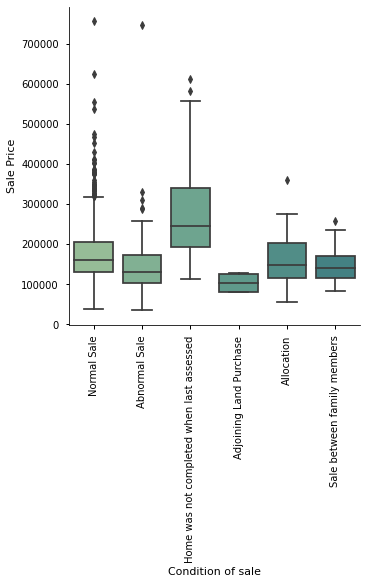

In [88]:
#SaleCondition vs SalePrice
a79 = sns.catplot(x = "SaleCondition", y = "SalePrice", data = df_nonnulled, kind = "box")
a79.set(xlabel = "Condition of sale", ylabel = "Sale Price")
a79.fig.suptitle("Condition of Sale", x = 0.5, y = 1.03)
a79.set_xticklabels(['Normal Sale', 'Abnormal Sale', 'Home was not completed when last assessed', 'Adjoining Land Purchase', 'Allocation', 'Sale between family members'])
plt.xticks(rotation = 90)
a79;

## Part II: Building and Tuning the Pipeline

In [118]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from xgboost import XGBRegressor

df = pd.read_csv(path/'train.csv', index_col="Id")
test_df = pd.read_csv(path/'test.csv', index_col="Id")
trainx = df.iloc[:,:-1]
trainy = df.iloc[:,-1]

### Pipeline:  
We are now going to build a pipeline which will:  
- remove useless columns from the data,  
- add composite features to the dataframe, for example, whether the house was underwent renovations/remodeling,  
- OneHotEncode categorical features,  
- pass the piped data to the final estimator, XGBRegressor.

### Adding the ability to remove columns within the pipeline

In [141]:
def column_remover(X, columns) -> pd.DataFrame:
    """Remove specified columns.  
    determine = False by default, if True will check which columns to remove, and remove them""" # Used in a pipeline to allow for Grid-Searching et cetera
    if len(columns) == 0:
        return X
    else:
        return X.drop(columns, axis=1)
    
# Passes the data through ColRemover
col_remover = FunctionTransformer(column_remover)

### Adding composite features to the dataframe

In [142]:
def remodeled_subgenerator(X) -> pd.DataFrame:
    """Adds feature 'Remodeled' to the dataframe, used within a pipeline"""
    out = X.copy()
    out["Remodeled"] = (out["YearBuilt"] < out["YearRemodAdd"]).astype("int")
    return out

def dateSold_subgenerator(X) -> pd.DataFrame:
    """Adds feature 'DateSold' to the dataframe, used within a pipeline"""
    out = X.copy()
    out["DateSold"] = (out["MoSold"] + (12 * out["YrSold"])).astype("int")
    return out

def secondaryArea_subgenerator(X) -> pd.DataFrame:
    """Adds feature 'SecondaryArea' to the dataframe, used within a pipeline"""
    
    out = X.copy()
    col_list = ["WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea"]
    out["SecondaryArea"] = 0
    
    # Add the areas together if not missing
    for col in col_list:
        try:
            out["SecondaryArea"] += out[col]
        except:
            continue
            
    # Check if all the columns were removed, if so, return unmodified input
    if out["SecondaryArea"].sum() == 0:
        return X
    
    # Check if only one column was used to calculate area, if so return unmodified input
    for col in col_list:
        try:
            if out["SecondaryArea"].sum() == out[col].sum():
                return X
        except:
            continue
    
    # Return the dataframe with the composite feature if there were at least 2 unremoved columns from col_list
    return out

def area_subgenerator(X) -> pd.DataFrame:
    """Adds feature 'Area' to the dataframe, used within a pipeline"""
    
    out = X.copy()
    col_list = ["TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GarageArea"]
    out["Area"] = 0
    
    # Add the areas together if not missing
    for col in col_list:
        try:
            out["Area"] += out[col]
        except:
            continue
            
    # Check if all the columns were removed, if so, return unmodified input
    if out["Area"].sum() == 0:
        return X
    
    # Check if only one column was used to calculate area, if so return unmodified input
    for col in col_list:
        try:
            if out["Area"].sum() == out[col].sum():
                return X
        except:
            continue
    
    # Return the dataframe with the composite feature if there were at least 2 unremoved columns from col_list
    return out



def feature_generator(X, subgenerators) -> pd.DataFrame:
    """Generates composite features from existing columns"""
    out = X
    for subgenerator in subgenerators:
        try:
            out = subgenerator(out)
        except:
            continue
    return out


# Generate composite features out of existing features
feature_gen = FunctionTransformer(feature_generator)  

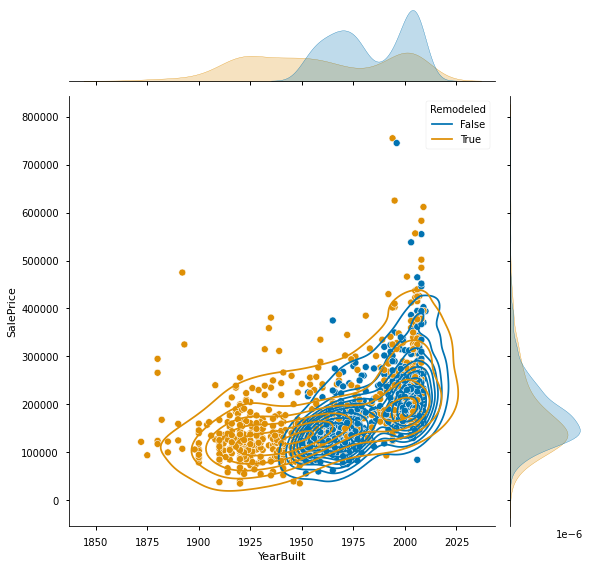

In [143]:
remodeled_df = pd.DataFrame()
sns.set_palette("colorblind")
remodeled_df["YearBuilt"] = df["YearBuilt"]
remodeled_df["YearRemodAdd"] = df["YearRemodAdd"]
remodeled_df["Remodeled"] = remodeled_df["YearBuilt"] < remodeled_df["YearRemodAdd"]
remodeled_df["SalePrice"] = df["SalePrice"]
sns.jointplot(data = remodeled_df, x = "YearBuilt", y = "SalePrice", hue = "Remodeled", height = 8).plot_joint(sns.kdeplot);

### The rest of the pipeline
One hot encoding the columns whose data type is 'object',  
XGBoost regressor that uses gpu acceleration

In [144]:
# Dummy encodes the categorical features
col_trans = ColumnTransformer(
    [('cat', OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=object))], 
    remainder='passthrough'
)

# Estimator
xgbreg = XGBRegressor(
    random_state=47, 
    tree_method="gpu_hist", 
    gpu_id=0
) # remove last two args if you encounter problems

# Full pipeline, takes a normal dataframe, ignores unused columns,
# generates composite features, encodes, and feeds into XGBoost
pipeline = Pipeline([
    ("col_remover", col_remover), 
    ("feature_gen", feature_gen), 
    ("col_trans", col_trans), 
    ("xgbreg", xgbreg)
])

In [145]:
pipeline["col_remover"].kw_args = {"columns":[]}
pipeline["feature_gen"].kw_args = {"subgenerators":[remodeled_subgenerator, dateSold_subgenerator, secondaryArea_subgenerator, area_subgenerator]}
pipeline["xgbreg"].n_estimators=200
print(f"Score before tuning, default parameters {cross_val_score(pipeline, trainx, trainy, cv=7).mean()}")

Score before tuning, default parameters 0.8668606024448126


### Let's figure out which columns influence accuracy positively
Since we can now easily remove columns within the pipeline, let us see which columns we should actually remove. We have the ability to use grid search but our goal is not to find the worst column, but to find the list of columns that make the model worse.  
  
The useful_columns function will give us the list of useful columns, in other words, the list of columns that when removed from the pipeline, will result in a lower score. Note, the composite columns are not formed if the ingredient column is removed.

In [146]:
def useful_columns(x, y, pipeline, cv=10) -> list:
    """Takes data and a pipeline that implements a column_remover, 
    determines which columns are not useful to the estimator"""
    
    from tqdm import tqdm
    
    # Get all columns
    cols = x.columns.to_list()
    
    # Set up a place to store the results
    useful_df = pd.DataFrame({"Column": cols, "Useful": np.full(len(cols), False)}).set_index("Column")
    
    # Evaluate pipeline with all the columns
    pipeline["col_remover"].kw_args = {"columns":[]}
    normal_score = cross_val_score(pipeline, x, y, cv=cv).mean()

    # Evaluate pipeline with one missing column, determining wether or not it becomes worse
    for col_id in tqdm(range(len(cols))):
        pipeline["col_remover"].kw_args = {"columns":[cols[col_id]]}
        if cross_val_score(pipeline, x, y, cv=cv).mean() < normal_score:
            useful_df.iat[col_id, 0] = True
            
    # Reset pipeline to default settings (no columns to remove)
    pipeline["col_remover"].kw_args = {"columns":[]}
    return useful_df.Useful.to_list()

In [147]:
# Calculating which columns are useful (might take a while)
useful = useful_columns(trainx, trainy, pipeline)
# Inverting the results, 
not_useful = trainx.columns[~np.array(useful)].to_list()
print(f"Number of useful columns: {sum(useful)}")
pipeline["col_remover"].kw_args = {"columns":not_useful}
print(f"Score after selecting useful columns {cross_val_score(pipeline, trainx, trainy, cv=10).mean()}")

100%|██████████| 79/79 [16:50<00:00, 12.79s/it]


Number of useful columns: 69
Score after selecting useful columns 0.8791386447903331


### Now, let us tune the hyperparameters

In [150]:
params = {
    "col_remover__kw_args": np.array([{"columns":not_useful}]),
    "xgbreg__gamma": np.array([0, 8]),
    "xgbreg__learning_rate": np.arange(0.05, 0.08, 0.01),
    "xgbreg__n_estimators": np.array([400]), # lowered to lower load
    "xgbreg__reg_lambda": np.arange(0.02, 0.08, 0.02),
    "xgbreg__gpu_id": np.array([0]),
    "xgbreg__tree_method": np.array(["gpu_hist"])
}

gridsearch = GridSearchCV(pipeline, params, verbose=1, pre_dispatch=4, cv=7)
gridsearch.fit(trainx, trainy)
gridsearch.best_score_

Fitting 7 folds for each of 18 candidates, totalling 126 fits


0.8804734655117751

In [152]:
gridsearch.best_params_

{'col_remover__kw_args': {'columns': ['Alley',
   'YearBuilt',
   'Exterior1st',
   'LowQualFinSF',
   'BsmtHalfBath',
   'FullBath',
   'BedroomAbvGr',
   'PoolArea',
   'MiscVal',
   'MoSold']},
 'xgbreg__gamma': 8,
 'xgbreg__gpu_id': 0,
 'xgbreg__learning_rate': 0.07,
 'xgbreg__n_estimators': 400,
 'xgbreg__reg_lambda': 0.02,
 'xgbreg__tree_method': 'gpu_hist'}

In [159]:
params = {
    "col_remover__kw_args": np.array([{"columns":not_useful}]),
    "xgbreg__gamma": np.array([5, 8]),
    "xgbreg__learning_rate": np.arange(0.068, 0.072, 0.001),
    "xgbreg__n_estimators": np.array([500]),
    "xgbreg__reg_lambda": np.arange(0.017, 0.023, 0.001)
}

gridsearch = GridSearchCV(pipeline, params, verbose=1, pre_dispatch=4, cv=7)
gridsearch.fit(trainx, trainy)
gridsearch.best_score_

Fitting 7 folds for each of 48 candidates, totalling 336 fits


0.8810379561152765

In [160]:
gridsearch.best_params_

{'col_remover__kw_args': {'columns': ['Alley',
   'YearBuilt',
   'Exterior1st',
   'LowQualFinSF',
   'BsmtHalfBath',
   'FullBath',
   'BedroomAbvGr',
   'PoolArea',
   'MiscVal',
   'MoSold']},
 'xgbreg__gamma': 5,
 'xgbreg__learning_rate': 0.07100000000000001,
 'xgbreg__n_estimators': 500,
 'xgbreg__reg_lambda': 0.017}

### Fitting the pipeline and predicting away the competition!

In [162]:
pipeline["col_remover"].kw_args = {"columns":not_useful}
pipeline["xgbreg"].gamma = 5
pipeline["xgbreg"].reg_lambda = 0.17
pipeline["xgbreg"].learning_rate = 0.071
pipeline["xgbreg"].n_estimators = 500
pipeline["xgbreg"].tree_method = "gpu_hist"
pipeline["xgbreg"].gpu_id = 0

print(cross_val_score(pipeline, trainx, trainy, cv=10).mean())

testx = pd.read_csv(path/"test.csv", index_col="Id")
pipeline.fit(trainx, trainy)
preds = pipeline.predict(testx)
preds

0.8773512606448062


array([134425.3 , 165358.12, 189805.83, ..., 164175.53, 110988.63,
       221475.77], dtype=float32)

In [163]:
testx["SalePrice"] = preds
testx.SalePrice.to_csv("predictions.csv", index=True, header=True)